<h1> Feed Forward Neural Network</h1>

Work Done by:<br>
<ul>
<li>AHMED SHMELS MUHE- GE22M009 </li>


The goal of this work is two fold: <br>
1. implement and use gradient descent (and its variants) with backpropagation for a classification task <br>
2. Getting familiar with wandb which is a cool tool for running and keeping track of a large number of experiments

In this project:

*  we have implemented a feedforward neural network and written the backpropagation code for training the network.
* We have used numpy for all matrix/vector operations.

* We have not used any automatic differentiation packages.

* This network is trained and tested using the Fashion-MNIST dataset.

* Specifically, given an input image (28 x 28 = 784 pixels) from the Fashion-MNIST dataset, the network is trained to classify the image into 1 of 10 classes.

# CS6910 - Assignment 1

The sections of this document correspond to the questions and instructions from the [assignment guidelines](https://wandb.ai/miteshk/assignments/reports/Assignment-1--VmlldzozNjk4NDE?accessToken=r7ndsh8lf4wlxyjln7phvvfb8ftvc0n4lyn4tiowdg06hhzpzfzki4jrm28wqh44).

## Questions and Tasks

### Question 1: Data Visualization
- **Task**: Download the fashion-MNIST dataset and plot one sample image for each class.

### Question 2: Neural Network Implementation
- **Task**: Implement a feedforward neural network for the fashion-MNIST data.

### Question 3: Backpropagation Algorithm
- **Task**: Implement the backpropagation algorithm with support for the following optimization functions: SGD, Momentum, Nesterov, RMSprop, Adam, Nadam.

### Question 4: Hyperparameter Tuning
- **Task**: Use wandb sweeps to find the best values for hyperparameters such as the number of epochs, hidden layers, neurons, learning rate, optimizer, etc.

### Question 5: Validation Set Accuracy
- **Task**: Report the best accuracy on the validation set across all models trained.

### Question 6: Configuration Insights
- **Task**: Make inferences about which configurations worked and which did not based on your experiments.

### Question 7: Test Set Evaluation
- **Task**: Report the accuracy on the test set of fashion_mnist for the best model and plot the confusion matrix.

### Question 8: Loss Function Comparison
- **Task**: Compare cross-entropy loss with squared error loss.

### Question 9: Code Repository
- **Task**: Paste a link to your GitHub code for this assignment.

### Question 10: MNIST Recommendations
- **Task**: Based on your learnings, give three recommendations for what would work for the MNIST dataset and report the accuracies.



---

### Declaration

Throughout the development of this project, we have leveraged a diverse array of online resources to enhance our understanding of key concepts, inform the structure of our code, and navigate any encountered challenges. We have made a concerted effort to acknowledge these resources in their relevant sections wherever possible.

Key resources that have played a significant role in shaping our project include:

- **Lecture Slides:** Prof. Mitesh Khapra's course CS6910 - Fundamentals of Deep Learning.  
  - [CS6910 - Fundamentals of Deep Learning](http://www.cse.iitm.ac.in/~miteshk/CS6910.html)
- **YouTube Lectures:** Prof. Mitesh Khapra's DeepLearning course lectures on deep learning fundamentals.  
  - [DeepLearning course lectures](https://www.youtube.com/playlist?list=PLyqSpQzTE6M9gCgajvQbc68Hk_JKGBAYT)
- **Official Documentation:** Python NumPy and wandb.ai.  
  - [Python Documentation](https://docs.python.org/3/)
  - [NumPy Documentation](https://numpy.org/doc/)
  - [wandb.ai Documentation](https://docs.wandb.ai/tutorials)
- **GitHub Repositories:** Open-source code repositories relevant to deep learning and neural networks.  
  - [Awesome Deep Learning](https://github.com/ChristosChristofidis/awesome-deep-learning)
  - [Awesome Artificial Intelligence](https://github.com/owainlewis/awesome-artificial-intelligence)
- **Academic Research:** Papers from arXiv/academic journals that provide theoretical insights and recent advancements in deep learning.
  1. **"Adam: A Method for Stochastic Optimization" by Kingma and Ba (2014)**
     - **Link:** [arXiv:1412.6980](https://arxiv.org/abs/1412.6980)
  2. **"On the Convergence of Adam and Beyond" by Reddi, Kale, and Kumar (2018)**
     - **Link:** [arXiv:1904.09237](https://arxiv.org/abs/1904.09237)
  3. **"Averaged Stochastic Gradient Descent with Weight Dropped Convergence Rate" by Junchi Li, Fadime Sener, and Vladlen Koltun (2021)**
     - **Link:** [arXiv:2106.01409](https://arxiv.org/abs/2106.01409)
- **Online Forums:** Reddit's r/MachineLearning and r/deeplearning for discussions and knowledge sharing.  
  - [r/MachineLearning](https://www.reddit.com/r/MachineLearning/)
  - [r/deeplearning](https://www.reddit.com/r/deeplearning/)
- **Coursera Courses:** Andrew Ng's ML Specialization and DL Specialization on Coursera.  
  - [Machine Learning Specialization](https://www.deeplearning.ai/courses/machine-learning-specialization/)
  - [Deep Learning Specialization](https://www.deeplearning.ai/courses/deep-learning-specialization/)
- **Additional Resources:**
  - [Optimization in Deep Learning: AdaGrad, RMSProp, Adam](https://artemoppermann.com/optimization-in-deep-learning-adagrad-rmsprop-adam/)
  - [Difference between RMSprop with momentum and Adam optimizers](https://datascience.stackexchange.com/questions/26792/difference-between-rmsprop-with-momentum-and-adam-optimizers)
  - [Optimization Techniques in Deep Learning](https://blogs.brain-mentors.com/optimization-techniques-in-deep-learning/)
  - [An overview of gradient descent optimization algorithms by Sebastian Ruder](https://www.ruder.io/optimizing-gradient-descent/)

We have endeavored to give credit to the resources that have influenced our work. Nonetheless, if any have been inadvertently overlooked, we extend our sincere apologies to the authors or content creators for not properly acknowledging their contributions to our project.

---

<h3>Importing necessary libraries.</h3>

In [ ]:
import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
import random
import tensorflow as tf
import seaborn as sn

<h3>Installing and importing wandb</h3>

- Wandb is used to keep track of various experiments performed and for efficient logging while doing hyperparameter tuning.
- The report for this project is also created using wandb

In [ ]:
!pip install wandb -qqq
import wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00



---

## 1. About the Dataset

### Fashion-MNIST Dataset

![Example image from the Fashion-MNIST dataset (label: T-shirt/top)](https://www.researchgate.net/profile/Saeed-Reza-Kheradpisheh/publication/342801790/figure/fig2/AS:911232181735425@1594266090934/Sample-images-from-Fashion-MNIST-dataset_W640.jpg)

*Example image from the Fashion-MNIST dataset (label: 1. T-shirt/top, 2. Trouser, 3. Pullover, 4. Dress, 5. Coat, 6. Sandal, 7. Shirt, 8. Sneaker, 9. Bag, 10. Ankle boot)*

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. This dataset is commonly used for benchmarking machine learning algorithms.

- **Image Dimensions:** 28 pixels in height and 28 pixels in width (total of 784 pixels)
- **Pixel Values:** Integers between 0 and 255, representing lightness or darkness.

**Labels:**

Each training and test example is assigned to one of the following labels:

1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

**References**


1. **Xiao, H., Rasul, K., & Vollgraf, R. (2017)**  
   *Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms.*  
   [arXiv preprint arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

2. **Kaggle**  
   [Fashion-MNIST on Kaggle](https://www.kaggle.com/zalando-research/fashionmnist)


---


<h3>Preparing dataset</h3>

In [ ]:
from sklearn.model_selection import train_test_split
# Import the train_test_split function from sklearn to split the dataset into train and validation sets

def prepare_data():
    """
    This function performs several steps to prepare the Fashion-MNIST dataset for training and evaluation:
    1. Load the dataset from the online source.
    2. Define the class labels for the dataset.
    3. Split the dataset into training, validation, and test sets.
    4. Normalize the pixel values of the images to be between 0 and 1.
    5. Flatten each image from a 2D array (28x28) into a 1D array (784).
    6. Convert the class labels into one-hot encoded vectors.

    Returns:
        X_train, X_val, X_test: Training, validation, and test sets of image data
        y_train, y_val, y_test: Corresponding one-hot encoded labels
        labels: List of class labels
    """
    # Step 1: Load data from the online source
    (train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

    # Step 2: Define class labels
    labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    num_classes = len(labels)

    # Print the initial number of data points in the train and test sets
    print("Number of data points in train data (initially) - ", len(train_x))
    print("Number of data points in test data (initially) - ", len(test_x))

    # Step 3: Perform train-validation split (10% of training data used for validation)
    train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=40)

    # Print the shape of each image
    print("Shape of each image - 28x28")
    image_shape = train_x.shape[1] * train_x.shape[2]
    print("Shape of each image (1D) - ", image_shape)

    # Store the number of images in each dataset
    train_image_count = len(train_x)
    val_image_count = len(val_x)
    test_image_count = len(test_x)

    # Step 4 & 5: Initialize matrices to store flattened and normalized image data
    X_train = np.zeros((train_image_count, image_shape))
    X_val = np.zeros((val_image_count, image_shape))
    X_test = np.zeros((test_image_count, image_shape))

    # Normalize and flatten the images
    for i in range(train_image_count):
        X_train[i] = (copy.deepcopy(train_x[i].flatten())) / 255.0
    for i in range(val_image_count):
        X_val[i] = (copy.deepcopy(val_x[i].flatten())) / 255.0
    for i in range(test_image_count):
        X_test[i] = (copy.deepcopy(test_x[i].flatten())) / 255.0

    # Step 6: One-hot encode the labels
    y_train = np.zeros((train_y.size, num_classes))
    y_train[np.arange(train_y.size), train_y] = 1

    y_val = np.zeros((val_y.size, num_classes))
    y_val[np.arange(val_y.size), val_y] = 1

    y_test = np.zeros((test_y.size, num_classes))
    y_test[np.arange(test_y.size), test_y] = 1

    # Return the datasets and labels
    return X_train, X_val, X_test, y_train, y_val, y_test, labels

<h3>Plotting images locally</h3>

In [ ]:
def plot_locally():
    """
    This function is used to plot a single image of each class label from the Fashion MNIST dataset
    on the local machine for visualization.
    """

    # Step 1: Retrieve the datasets using the prepare_data function
    xtrain, xval, xtest, ytrain, yval, ytest, labels = prepare_data()

    # Step 2: Create a list of tuples, each containing an image and its corresponding label
    train = list(zip(xtrain, ytrain))

    # Initialize an empty list to keep track of the sampled images for each class
    sample_images = []

    # Set the title for the plot
    plt.suptitle("Plotting image of each class from Fashion MNIST Dataset")

    # Counter for subplot positioning
    i = 1

    # Step 3: Loop until we have sampled one image from each class
    while len(sample_images) != 10:
        # Randomly select an index from the training dataset
        n = random.randrange(0, len(train))

        # Extract the label index of the selected image
        lab_index = np.asarray(np.nonzero(train[n][1]))[0][0]

        # Check if this class label has already been sampled
        if lab_index not in sample_images:
            # If not, add the label index to the list of sampled images
            sample_images.append(lab_index)

            # Plot the image in the next subplot position
            plt.subplot(3, 5, i)
            plt.title(labels[lab_index])
            plt.axis(False)  # Hide the axis
            plt.imshow(train[n][0].reshape((28, 28)))  # Reshape and plot the image

            # Increment the subplot counter
            i = i + 1

4422102/4422102 [==============================] - 0s 0us/step
Number of data points in train data (initially) -  60000
Number of data points in test data (initially) -  10000
Shape of each image - 28x28
Shape of each image (1D) -  784


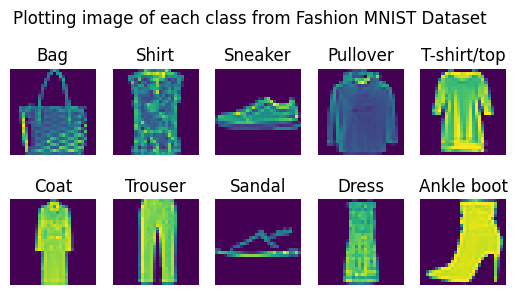

In [ ]:
plot_locally()

<h3>Plotting images via wandb</h3>

In [ ]:
# Forcing Relogin to ensure that you are logging into your account alone
!wandb login --relogin
# Find your API Key and paste it in the run box

# You can change the entity name and project name
entity_name="ahmecse"
project_name="GPT100"

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
def plot_images_wandb(entity_name, project_name):
    """
    This function plots a single image of each class label from the Fashion MNIST dataset
    on the Weights & Biases (wandb) platform for visualization.
    """

    # Step 1: Initialize the wandb run with the specified entity and project name
    wandb.init(entity=entity_name, project=project_name, name="log_images")

    # Step 2: Retrieve the datasets using the prepare_data function
    xtrain, xval, xtest, ytrain, yval, ytest, labels = prepare_data()

    # Step 3: Create a list of tuples, each containing an image and its corresponding label
    train = list(zip(xtrain, ytrain))

    # Initialize an empty list to keep track of the sampled images for each class
    sample_images = []

    # Initialize a list to store wandb Image objects for logging
    wandb_arr = []

    # Counter for the number of images added to wandb_arr
    i = 1

    # Step 4: Loop until we have sampled one image from each class
    while len(sample_images) != 10:
        # Randomly select an index from the training dataset
        n = random.randrange(0, len(train))

        # Extract the label index of the selected image
        lab_index = np.asarray(np.nonzero(train[n][1]))[0][0]

        # Check if this class label has already been sampled
        if lab_index not in sample_images:
            # If not, add the label index to the list of sampled images
            sample_images.append(lab_index)

            # Add the image to the wandb_arr list with a caption indicating its class label
            wandb_arr.append(wandb.Image(train[n][0].reshape((28, 28)), caption=labels[lab_index]))

            # Increment the counter
            i = i + 1

    # Step 5: Log the images to wandb
    wandb.log({"images": wandb_arr})

    # Step 6: Finish the wandb run
    wandb.finish()

In [ ]:
plot_images_wandb(entity_name,project_name)

wandb: Currently logged in as: ahmecse. Use `wandb login --relogin` to force relogin


Number of data points in train data (initially) -  60000
Number of data points in test data (initially) -  10000
Shape of each image - 28x28
Shape of each image (1D) -  784


<h2> Defining Various Utility functions</h2>

Throughout this project, we have used various functions that we have each individually defined in this section.
<ul>
<li> Initialization Functions</li>
<li> Loss Functions</li>
<li> Activation Funcitons</li>
<li> Activation Funcitons and their derivatives</li>

<h3> Initialization Functions</h3>

<h4>Xavier</h4>

### References for Xavier Initialization

1. **Deep Learning AI**  
   [AI Notes on Initializing Neural Networks](https://www.deeplearning.ai/ai-notes/initialization/index.html)

2. **Towards Data Science**  
   [Xavier Glorot Initialization in Neural Networks — Math Proof](https://towardsdatascience.com/xavier-glorot-initialization-in-neural-networks-math-proof-4682bf5c6ec3)

3. **Machine Learning Mastery**  
   [Weight Initialization for Deep Learning Neural Networks](https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/)

4. **Xavier Glorot and Yoshua Bengio (2010)**  
   [Understanding the difficulty of training deep feedforward neural networks](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)

5. **Deep Learning Book by Ian Goodfellow, Yoshua Bengio, and Aaron Courville**  
   [Chapter 8: Optimization for Training Deep Models](https://www.deeplearningbook.org/contents/optimization.html)

---

- `Xavier initialization`, also known as `Glorot initialization`, is a method to initialize the weights of neural networks to ensure that the variance of the activations is consistent across layers.

- This initialization is particularly useful for deep networks and helps to prevent the vanishing or exploding gradients problem during training.

The weights are initialized from a uniform distribution in the range (-s, s), where  $s = \sqrt{\frac{6}{n_{in} + n_{out}}}$ and $n_{in}$ and $n_{out}$ are the number of input and output units of the layer, respectively.





In [ ]:

def Xavier(layer_sizes):
    """
    Xavier initialization for network parameters.
    Args:
        layer_sizes (list): List containing the number of neurons in each layer.
    Returns:
        dict: Dictionary containing initialized weights and biases.
    """

    params = {}
    for i in range(1,len(layer_sizes)):

        norm_xav=np.sqrt(6)/np.sqrt(layer_sizes[i]+layer_sizes[i-1])
        params["w"+str(i)]=np.random.randn(layer_sizes[i],layer_sizes[i-1])*norm_xav
        params["b"+str(i)]=np.zeros((layer_sizes[i],1))

    return params

<h4> Random</h4>

### References for Random Initialization

1. **Machine Learning Mastery**  
   [Weight Initialization for Deep Learning Neural Networks](https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/)

2. **Deep Learning Book by Ian Goodfellow, Yoshua Bengio, and Aaron Courville**  
   [Chapter 8: Optimization for Training Deep Models](https://www.deeplearningbook.org/contents/optimization.html)

3. **Christian Versloot's GitHub - Machine Learning Articles**  
   [The Necessity for Weight Initialization - Random Initialization, Vanishing and Exploding Gradients](https://github.com/christianversloot/machine-learning-articles/blob/main/random-initialization-vanishing-and-exploding-gradients.md)


- `Random initialization` initializes the weights of the neural network from a normal distribution with mean 0 and standard deviation 0.01, and the biases from a normal distribution with mean 0 and standard deviation 0.01.
- This method is used to `introduce randomness in the initial weights and biases`, which can help `prevent symmetry breaking` and provide different starting points for the optimization algorithm.


In [ ]:
def Random(layer_sizes):
    """
    Random initialization for network parameters.
    Args:
        layer_sizes (list): List containing the number of neurons in each layer.
    Returns:
        dict: Dictionary containing initialized weights and biases.
    """

    params = {}
    for i in range(1,len(layer_sizes)):
        params["w"+str(i)]=0.01*np.random.randn(layer_sizes[i],layer_sizes[i-1])
        params["b"+str(i)]=0.01*np.random.randn(layer_sizes[i],1)

    return params

<h3> Activation Functions </h3>



### References for Different Activation Functions

1. **Machine Learning Mastery**  
   [Choose an Activation Function for Deep Learning](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/)

2. **Medium - Omkar Nallagoni**  
   [Understanding Activation Functions in Neural Networks](https://medium.com/@omkar.nallagoni/activation-functions-with-derivative-and-python-code-sigmoid-vs-tanh-vs-relu-44d23915c1f4)

3. **DigitalOcean**  
   [Sigmoid Activation Function with Python](https://www.digitalocean.com/community/tutorials/sigmoid-activation-function-python)

4. **Machine Learning Mastery**  
   [Softmax Activation Function with Python](https://machinelearningmastery.com/softmax-activation-function-with-python/)

5. **Vidyasheela**  
   [Hyperbolic Tangent (tanh) Activation](https://vidyasheela.com/post/hyperbolic-tangent-tanh-activation-function-with-python-code)

6. **Vidyasheela**  
   [ReLU Activation Function](https://vidyasheela.com/post/relu-activation-function-with-python-code)


<h4> Sigmoid</h4>

The sigmoid activation function is defined as:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

where:
- $\sigma(x)$ is the output of the sigmoid function.
- $x$ is the input to the function.
- $e$ is the base of the natural logarithm.


In [ ]:
def sigmoid(pre_act):
    """
    Sigmoid activation function.
    Args:
        x (numpy.ndarray): Input array.
    Returns:
        numpy.ndarray: Output after applying sigmoid function.
    """
    try:
      return (1.0/(1.0+np.exp(-pre_act)))
    except:
      print("error in sigmoid")

<h4>Tanh</h4>




The tanh activation function is defined as:

$$\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$

where:
- $\tanh(x)$ is the output of the tanh function.
- $x$ is the input to the function.
- $e$ is the base of the natural logarithm.


In [ ]:
def tanh(pre_act):
  """
    Tanh activation function.
    Args:
        x (numpy.ndarray): Input array.
    Returns:
        numpy.ndarray: Output after applying tanh function.
    """
  return (np.tanh(pre_act))


<h4>ReLU</h4>



The ReLU (Rectified Linear Unit) activation function is defined as:

$$
\text{ReLU}(x) = \max(0, x)
$$

where:
- $\text{ReLU}(x)$ is the output of the ReLU function.
- $x$ is the input to the function.

In [ ]:
def relu(pre_act):
  """
    ReLU activation function.
    Args:
        x (numpy.ndarray): Input array.
    Returns:
        numpy.ndarray: Output after applying ReLU function.
    """
  return (np.maximum(0,pre_act))

<h4> Output Activation : Softmax</h4>




The softmax activation function is defined as:

$$
\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
$$

where:
- $\text{Softmax}(x_i)$ is the softmax output for the $i$-th element.
- $x_i$ is the $i$-th element of the input vector $x$.
- The sum in the denominator is taken over all elements in the input vector.

In [ ]:
def softmax(x):
  """
    Softmax activation function.
    Args:
        x (numpy.ndarray): Input array.
    Returns:
        numpy.ndarray: Output after applying softmax function.
    """
  try:
    return(np.exp(x)/np.sum(np.exp(x)))
  except:
    print("error in softmax")

<h4> Derivatives of Activation Functions </h4>

### References for Derivatives of Activation Functions

1. **Towards Data Science**  
   [Derivative of the Softmax Function and the Categorical Cross-Entropy Loss](https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1)

2. **Towards Data Science**  
   [Derivative of the Sigmoid Function](https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e)

3. **Ronny Rest's Blog**  
   [Derivative of the Hyperbolic Tangent Function (tanh)](http://ronny.rest/blog/post_2017_08_16_tanh/)

4. **Vidyasheela**  
   [What is the Derivative of the ReLU Activation Function? (Including Python Function)](https://vidyasheela.com/post/what-is-the-derivative-of-the-relu-activation-function-including-python-function)


<h4>Derivative of Sigmoid</h4>

The derivative of the sigmoid activation function is given by:

$$
\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))
$$

where:
- $\sigma(x)$ is the sigmoid function.
- $\sigma'(x)$ is the derivative of the sigmoid function.



In [ ]:
def sigmoid_derivative(x):
  """
    Derivative of sigmoid activation function.
    Args:
        x (numpy.ndarray): Input array.
    Returns:
        numpy.ndarray: Derivative of sigmoid function.
    """
  return sigmoid(x)*(1-sigmoid(x))


<h4>Derivative of Tanh</h4>

The derivative of the tanh activation function is given by:

$$
\tanh'(x) = 1 - \tanh^2(x)
$$

where:
- $\tanh(x)$ is the tanh function.
- $\tanh'(x)$ is the derivative of the tanh function.


In [ ]:
def tanh_derivative(x):
  """
    Derivative of tanh activation function.
    Args:
        x (numpy.ndarray): Input array.
    Returns:
        numpy.ndarray: Derivative of tanh function.
    """
  return 1.0 -tanh(x)**2



<h4>Derivative of ReLU</h4>

The derivative of the ReLU activation function is given by:

$$
\text{ReLU}'(x) =
\begin{cases}
1 & \text{if } x > 0 \\
0 & \text{otherwise}
\end{cases}
$$

where:
- $\text{ReLU}'(x)$ is the derivative of the ReLU function.


In [ ]:
def relu_derivative(x):
  """
    Derivative of ReLU activation function.
    Args:
        x (numpy.ndarray): Input array.
    Returns:
        numpy.ndarray: Derivative of ReLU function.
    """
  return 1. * (x>0)


<h4>Derivative of Softmax</h4>

The derivative of the softmax activation function for a single output unit is given by:

$$
\text{Softmax}'(x_i) = \text{Softmax}(x_i) \cdot (1 - \text{Softmax}(x_i))
$$

where:
- $\text{Softmax}(x_i)$ is the softmax function for the $i$-th output unit.
- $\text{Softmax}'(x_i)$ is the derivative of the softmax function for the $i$-th output unit.

In [ ]:
def softmax_derivative(x):
  """
    Derivative of softmax activation function.
    Args:
        x (numpy.ndarray): Input array.
    Returns:
        numpy.ndarray: Derivative of softmax function.
    """
  return softmax(x) * (1-softmax(x))

<h4>Derivative of Activation Function</h4>

The derivative of the activation function can be calculated based on the type of activation function used:

- For the **sigmoid** activation function:

$$
\text{derivative}(A, \text{"sigmoid"}) = \sigma'(A) = \sigma(A) \cdot (1 - \sigma(A))
$$

- For the **tanh** activation function:

$$
\text{derivative}(A, \text{"tanh"}) = \tanh'(A) = 1 - \tanh^2(A)
$$

- For the **ReLU** activation function:

$$
\text{derivative}(A, \text{"relu"}) = \text{ReLU}'(A) =
\begin{cases}
1 & \text{if } A > 0 \\
0 & \text{otherwise}
\end{cases}
$$

- The derivative for the **softmax** activation function is not need coz we will use it in the final layer only.

The function takes the input array `A` and the name of the activation function `activation`, and returns the derivative of the activation function with respect to `A`.


In [ ]:
def derivative(A, activation):
  """
    Derivative of activation function.
    Args:
        A (numpy.ndarray): Input array.
        activation (str): Activation function name.
    Returns:
        numpy.ndarray: Derivative of activation function.
    """
  if activation == "sigmoid":
    return sigmoid_derivative(A)
  elif activation == "tanh":
    return tanh_derivative(A)
  elif activation == "relu":
    return relu_derivative(A)
  # elif activation == "softmax":
  #   return softmax_derivative(A)
  # else:
  #   raise ValueError("Invalid activation function")

<h3>Loss Functions</h3>

### References for Loss Functions

1. **Machine Learning Mastery**  
   [Loss and Loss Functions for Training Deep Learning Neural Networks](https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/)

2. **Towards Data Science**  
   [Derivative of the Softmax Function and the Categorical Cross-Entropy Loss](https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1)

3. **Medium - Arjun Sarkar**  
   [Implementation of All Loss Functions (Deep Learning) in NumPy, TensorFlow, and PyTorch](https://arjun-sarkar786.medium.com/implementation-of-all-loss-functions-deep-learning-in-numpy-tensorflow-and-pytorch-e20e72626ebd)

4. **Program Creek**  
   [Python Example for Mean Squared Error](https://www.programcreek.com/python/?CodeExample=mean%20squared%20error)

5. **Machine Learning Mastery**  
   [Cross-Entropy for Machine Learning](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)

<h4> Mean Squared Error Loss</h4>


The Mean Squared Error (MSE) loss is used for regression tasks and is defined as:

$$
\text{MSE}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where:
- $y$ is the true labels.
- $\hat{y}$ is the predicted labels.
- $n$ is the number of samples.


In [ ]:
def MSE(y, y_hat):
  """
    Mean Squared Error loss function.
    Args:
        y (numpy.ndarray): True labels.
        y_hat (numpy.ndarray): Predicted labels.
    Returns:
        float: Mean Squared Error loss.
    """
  error = np.sum(((y - y_hat)**2) / (2 * len(y)))
  return error

<h4>Cross Entropy Loss</h4>


The Cross Entropy loss is used for classification tasks and is defined as:

$$
\text{CrossEntropy}(y, \hat{y}) = -\sum_{i=1}^{n} y_i \log(\hat{y}_i)
$$

where:
- $y$ is the true labels (one-hot encoded).
- $\hat{y}$ is the predicted labels (probabilities).
- $n$ is the number of classes.

In [ ]:
def CrossEntropy(y, y_hat):
  """
    Cross Entropy loss function.
    Args:
        y (numpy.ndarray): True labels.
        y_hat (numpy.ndarray): Predicted labels.
    Returns:
        float: Cross Entropy loss.
    """
  error = - np.sum( np.multiply(y , np.log(y_hat)))/len(y)
  return error

<h4> Regularization (weight decay)</h4>



### References for Regularization (Weight Decay)

1. **Towards Data Science**  
   [Weight Decay (L2 Regularization)](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)

2. **Medium - UnpackAI**  
   [Stay Away from Overfitting: L2 Norm Regularization (Weight Decay) and L1 Norm Regularization](https://medium.com/unpackai/stay-away-from-overfitting-l2-norm-regularization-weight-decay-and-l1-norm-regularization-795bbc5cf958)



- Regularization is a technique used to prevent overfitting in machine learning models by adding a penalty term to the loss function.
- Weight decay, also known as L2 regularization, is a common form of regularization where the penalty term is proportional to the square of the magnitude of the weights.

The regularized loss function with weight decay is defined as:

$$
L_{\text{regularized}} = L_{\text{original}} + \frac{\lambda}{2N} \sum_{i=1}^{N} w_i^2
$$

where:
- $L_{\text{original}}$ is the original loss function (e.g., cross-entropy or mean squared error).
- $\lambda$ is the regularization parameter that controls the strength of the regularization.
- $N$ is the number of samples.
- $w_i$ are the weights of the model.

The regularization term $\frac{\lambda}{2N} \sum_{i=1}^{N} w_i^2$ penalizes large weights, encouraging the model to learn simpler and more generalizable patterns.


In [ ]:
# Calculating loss
def loss_calc(loss_name, y, y_hat, lambd, layer_sizes, parameters):
    """
    Calculates the loss for a given set of predictions and actual labels,
    with an option for L2 regularization.

    Args:
    - loss_name: A string indicating the type of loss function to use ('squared_loss' or 'cross_entropy').
    - y: The actual labels (one-hot encoded) for the data.
    - y_hat: The predicted labels (probabilities) for the data.
    - lambd: The regularization parameter (lambda).
    - layer_sizes: A list containing the sizes of each layer in the neural network.
    - parameters: A dictionary containing the weights and biases of the neural network.

    Returns:
    - regularized_error: The calculated loss, including the regularization term if applicable.
    """

    # Initialize error to zero
    error = 0

    # Calculate the loss based on the specified loss function
    if loss_name == "squared_loss":
        error = MSE(y, y_hat)  # Mean Squared Error
    elif loss_name == "cross_entropy":
        error = CrossEntropy(y, y_hat)  # Cross-Entropy Loss

    # Initialize the regularization error
    regularized_error = 0.0

    # Calculate the L2 regularization term for the weights of each layer
    for i in range(len(layer_sizes) - 1, 0, -1):
        regularized_error += np.sum(parameters["w" + str(i)] ** 2)

    # Combine the loss and the regularization term
    regularized_error = error + ((lambd / (2 * len(y))) * regularized_error)
    # Return the regularized error
    return regularized_error



<h4> Accuracy <h4>




### References for Accuracy

1. **Towards Data Science**  
   [Comprehensive Guide to Multiclass Classification with sklearn](https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362)

2. **Scikit-learn**  
   [Accuracy Score Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

   <h4>Accuracy</h4>

- Accuracy is a metric used to evaluate the performance of a classification model.
- It is defined as the ratio of correctly predicted instances to the total number of instances in the dataset.

The accuracy score is calculated as:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$


In [ ]:
def calc_accuracy(res, y_t):
    '''
    Calculates the accuracy of predictions by comparing predicted labels to true labels.

    Args:
    - res: List of predicted labels as probability distributions.
    - y_t: List of true labels as one-hot encoded vectors.

    Returns:
    - Accuracy: Percentage of correct predictions.
    '''

    # Initialize a counter for correct predictions
    acc=0.0

    # Iterate over predicted and true labels
    for x in range(len(res)):
      # Check if the index of the maximum value in the predicted label
      # matches the index of the 1 in the true label
      if(res[x].argmax()==y_t[x].argmax()):
        # Increment the counter for correct predictions
        acc+=1

    # Calculate the accuracy as a percentage
    acc=acc/len(y_t)
    # Return the accuracy
    return(acc*100)

In [ ]:
def calc_test_accuracy(y_pred, y_t):
  '''
    Calculates the accuracy of predictions by comparing predicted labels to true labels.

    Args:
    - y_pred: List of predicted labels.
    - y_t: List of true labels.

    Returns:
    - Accuracy: Percentage of correct predictions.
    '''
   # Initialize a counter for correct predictions
  acc=0.0
  # Iterate over predicted and true labels
  for i in range(len(y_pred)):
    # Check if the predicted label matches the true label

    if(y_pred[i]==y_t[i]):
      # Increment the counter for correct predictions
      acc+=1
  # Calculate the accuracy as a percentage
  acc=acc/len(y_t)
  # Return the accuracy
  return(acc*100)

<h1>2. Implementation of the Neural Network



### References for Initialization of Neural Network

Intuition about how to store the various parameters in our network and the overall architecture of the network was taken from the following articles:

1. **Kaggle**  
   [L-Layer Neural Network using NumPy](https://www.kaggle.com/mtax687/l-layer-neural-network-using-numpy)

2. **Analytics Vidhya**  
   [How to Initialize Weights in Neural Networks](https://www.analyticsvidhya.com/blog/2021/05/how-to-initialize-weights-in-neural-networks/)

3. **Towards Data Science**  
   [Weight Initialization Techniques in Neural Networks](https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78)


In [ ]:
# Initializes the parameters of the neural network based on the specified initialization type.
def nn_init(layer_sizes, init_type="random"):
    '''
    Args:
    - layer_sizes: List containing the sizes of each layer in the neural network.
    - init_type: String specifying the type of initialization to use ('xavier' or 'random').

    Returns:
    - params: Dictionary containing the initialized parameters for each layer in the neural network.
    '''

    # Initialize an empty dictionary to store the parameters
    params = {}

    # Initialize the parameters using Xavier initialization
    if init_type == "xavier":
        params = Xavier(layer_sizes)

    # Initialize the parameters using random initialization
    elif init_type == "random":
        params = Random(layer_sizes)

    # Raise an error if an invalid initialization type is provided
    else:
        raise ValueError("Enter a valid weight initialization type: 'xavier' or 'random'")

    return params


<h2> Forward Propagation</h2>


### References for Forward Propagation

1. **GeeksforGeeks**  
   [Implementation of Neural Network from Scratch using NumPy](https://www.geeksforgeeks.org/implementation-of-neural-network-from-scratch-using-numpy/)

2. **Towards Data Science**  
   [Back Propagation Demystified in 7 Minutes](https://towardsdatascience.com/back-propagation-demystified-in-7-minutes-4294d71a04d7)

3. **Towards Data Science**  
   [Coding Neural Network Forward Propagation and Backpropagation](https://towardsdatascience.com/coding-neural-network-forward-propagation-and-backpropagtion-ccf8cf369f76)

4. **YouTube: Samson Zhang**  
   [Neural Networks - Forward Propagation (Deep Learning SIMPLIFIED)](https://www.youtube.com/watch?v=w8yWXqWQYmU&t=912s&ab_channel=SamsonZhang)

## Forward Propagation Pseudocode

1. **Function Definition**:
   - Inputs:
     - `X`: Input data point (reshaped as a column vector).
     - `y`: True label vector.
     - `params`: Dictionary containing network parameters.
     - `active`: Chosen activation function (`sigmoid`, `tanh`, or `relu`).
     - `layer_sizes`: List containing sizes of each layer in the network.

2. **Initialization**:
   - Initialize `out` as a deep copy of `X` reshaped as a column vector.
   - Initialize empty lists `h` and `a` to store activation and preactivation values.

3. **Forward Propagation**:
   - If `active` is `sigmoid`, `tanh`, or `relu`, iterate over hidden layers (excluding input and output layers).
     - For each hidden layer:
       - Retrieve weights and biases for the layer.
       - Calculate preactivation value `out` using formula: `out = np.dot(weights, h[i-1]) + biases`.
       - Append `out` to list `a`.
       - Calculate post-activation value `post_a` based on `active` function and append to `h`.
   - If `active` is not recognized, print an error message.

4. **Final Layer Calculation**:
   - Calculate preactivation value for output layer using weights and biases.
   - Calculate output `y_hat` by applying **softmax function** to preactivation value.

5. **Return Values**:
   - `h`: List of activation values for each layer, including input and output layers.
   - `a`: List of preactivation values for each layer, including input and output layers.
   - `y_hat`: Predicted label for input data point.


In [ ]:
def forward_prop(X, y, params, active, layer_sizes):
    '''
    This function is used to forward propagate the data point and return
    the predicted label.

    Input is the given data point (only one data point) and its respective true
    label vector, the parameters dictionary, the activation functions choice
    and the overall architecture of the network.

    Output is the predicted y label i.e., y_hat and the list of
    various preactivations and post activations for each neuron of each layer.
    (Each is stored as a list of lists)
    '''

    # Extracting only the image data not the label for the image data
    out = copy.deepcopy(X)
    out = out.reshape(-1, 1)

    # These are stored just to make it easy to keep track of the indices along with layers.
    h = [out]  # To save the activations for each neuron in a layer
    a = [out]  # To save the preactivation for each neuron in a layer

    if active == "sigmoid":
        for i in range(1, len(layer_sizes) - 1):
            weights = params["w" + str(i)]
            biases = params["b" + str(i)]

            # Forward Propagation logic For Sigmoid
            out = np.dot(weights, h[i - 1]) + biases
            a.append(out)
            post_a = sigmoid(out)
            h.append(post_a)

    elif active == "tanh":
        for i in range(1, len(layer_sizes) - 1):
            weights = params["w" + str(i)]
            biases = params["b" + str(i)]

            # Forward Propagation logic For Tanh
            out = np.dot(weights, h[i - 1]) + biases
            a.append(out)
            post_a = tanh(out)
            h.append(post_a)

    elif active == "relu":
        for i in range(1, len(layer_sizes) - 1):
            weights = params["w" + str(i)]
            biases = params["b" + str(i)]

            # Forward Propagation logic For relu
            out = np.dot(weights, h[i - 1]) + biases
            a.append(out)
            post_a = relu(out)
            h.append(post_a)
    else:
        print("Enter a valid activation function")

    # Final step for forward propagation, using softmax.
    weights = params["w" + str(len(layer_sizes) - 1)]
    biases = params["b" + str(len(layer_sizes) - 1)]

    out = np.dot(weights, h[len(layer_sizes) - 2]) + biases
    a.append(out)
    y_hat = softmax(out)
    h.append(y_hat)

    # in h we are storing values for layers right from input till output
    # h0 is input
    # in a we are storing values for layers right from input till output
    # a0 is input

    return h, a, y_hat


<h2>Back Propagation</h2>


### References for Backpropagation

1. **Swarthmore College**  
   [Backpropagation Derivation](https://www.cs.swarthmore.edu/~meeden/cs81/s10/BackPropDeriv.pdf)

2. **GitHub Pages**  
   [Neural Networks with Numpy](https://dfdazac.github.io/06-neural-networks-numpy.html)

3. **IITM POD**  
   [CS6910 - Lecture 4](https://iitm-pod.slides.com/arunprakash_ai/cs6910-lecture-4/fullscreen) (Lecture slides from Mitesh Khapra)

4. **YouTube - The Sound of AI**  
   [Backpropagation Explained - Machine Learning](https://www.youtube.com/watch?v=Z97XGNUUx9o&ab_channel=ValerioVelardo-TheSoundofAI) (Video by Valerio Velardo)



## Back Propagation Pseudocode

1. **Function Definition**:
   - Inputs:
     - `y`: True label vector.
     - `y_hat`: Predicted label vector.
     - `h`: List of activation values for each layer.
     - `a`: List of preactivation values for each layer.
     - `params`: Dictionary containing network parameters.
     - `loss_type`: Type of loss function (`squared_loss` or `cross_entropy`).
     - `layer_sizes`: List containing sizes of each layer in the network.
     - `activation`: Chosen activation function.

2. **Initialization**:
   - Initialize an empty dictionary `grad` to store the gradients.

3. **Loss Gradient Calculation**:
   - If `loss_type` is `squared_loss`:
     - Calculate the gradient of the loss with respect to the output of the last layer.
   - Else if `loss_type` is `cross_entropy`:
     - Calculate the gradient of the loss with respect to the output of the last layer.

4. **Backward Propagation**:
   - Iterate over layers from the output layer to the first hidden layer in reverse order.
     - For each layer:
       - Compute gradients for weights and biases.
       - If not at the first hidden layer:
         - Compute gradients for pre-activations and post-activations of the previous layer.

5. **Return Value**:
   - `grad`: Dictionary containing gradients of parameters.



In [ ]:
def back_prop(y, y_hat, h, a, params, loss_type, layer_sizes, activation):

  '''This is the heart of the code. It is used to back propagate the calculated
  error and calculating the gradients for each required entity

  The input is the true label, predicted label, preactivations, postactivations,
  paramters dicionary, the type of loss considered, overall network architecture
  and the choice of activation function.

  The output is the gradient dictionary which stores the gradients calculated
  for each parameter. '''

  # We are considering point by point. i.e., we are propagating only one point,
  # then back propagation that single point only.

  #here both y_hat and y are assumed to be column vectors

  # Initializing the empty dictionary to store the gradients
  grad = {}

  if loss_type == "squared_loss":
    grad["dh"+str(len(layer_sizes)-1)] = (y_hat - y)
    grad["da"+str(len(layer_sizes)-1)] = (y_hat - y) * softmax_derivative(a[len(layer_sizes)-1])

  elif loss_type == 'cross_entropy':
    # Here actually it should be one hot vector (As seen in class).
    # But y does the same job (since it is also one hot encoded)
    grad["da"+str(len(layer_sizes)-1)] = -(y-y_hat)
    grad["dh"+str(len(layer_sizes)-1)] = -(y/y_hat)

  for i in range(len(layer_sizes)-1, 0, -1 ):
    #print(i)
    # Not considering L2 Regularization here. Instead will cumulate in the update section
    # As referred from the resource pointed in Regularization section.

    grad["dw"+str(i)] = np.dot(grad["da"+str(i)], np.transpose(h[i-1]))
    grad["db"+str(i)] = grad["da"+str(i)]

    #Since we are going backwards, we wont execute these for the final iteration
    if i > 1:
      grad["dh"+str(i-1)] = np.dot(np.transpose(params["w"+str(i)]), grad["da"+str(i)])
      grad["da"+str(i-1)] = np.multiply(grad["dh" + str(i-1)], derivative(a[i-1],activation))
  return grad

## Batchwise Gradient Calculation for Neural Network Training

- Small function that calculates the gradients for a given batch of points.

In [ ]:
def grad_calculate_batchwise(X, Y, parameters, activation, layers, loss_function):

    """
    Calculates the cumulative gradients for a given batch of data points.

    Args:
    - X: The batch of input data points.
    - Y: The corresponding true labels for the data points.
    - parameters: The parameters of the neural network.
    - activation: The activation function used in the neural network.
    - layers: The architecture of the neural network (list of layer sizes).
    - loss_function: The loss function used for training the neural network.

    Returns:
    - grads: A dictionary containing the cumulative gradients for the batch.
    """
    # Initialize an empty dictionary to store the gradients.
    grads={}
    grads.clear()

    # Iterate over all the points in the current batch.
    for j in range(len(X)):

      # Reshape the labels to get a column vector.
      y = np.reshape(Y[j], (-1,1))

      # Feed forward the data point through the neural network.
      h,a,y_hat = forward_prop(X[j], y, parameters, activation, layers)

      # Backpropagate the error to calculate the gradients.
      new_grads = back_prop(y,y_hat, h,a, parameters, loss_function, layers, activation)

      # Accumulate the gradients for all the data points in the batch.
      if j == 0:

        # For the first data point, the gradients are simply the calculated gradients.
        grads = copy.deepcopy(new_grads)

      else:

        # For subsequent data points, increment the previous gradient values with the current gradients.
        for k in range(len(layers)-1,0,-1):
          grads["dw"+str(k)] += new_grads["dw"+str(k)]
          grads["db"+str(k)] += new_grads["db"+str(k)]
    # Return the cumulative gradients for the batch.
    return grads

<h1>3. Different Optimization Functions</h2>

<h3> 3.1. Mini Batch Gradient Descent </h3>

For each layer $j$ in the neural network, the weights and biases are updated as follows:

- Weights update:
$$
\mathbf{W}^{[j]} \leftarrow \left(1 - \frac{\eta \lambda}{\text{mini_batch_size}}\right) \mathbf{W}^{[j]} - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{W}^{[j]}}
$$

- Biases update:
$$
\mathbf{b}^{[j]} \leftarrow \mathbf{b}^{[j]} - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{b}^{[j]}}
$$

where:
- $\mathbf{W}^{[j]}$ and $\mathbf{b}^{[j]}$ are the weights and biases of the $j$-th layer, respectively.
- $\frac{\partial \mathcal{L}}{\partial \mathbf{W}^{[j]}}$ and $\frac{\partial \mathcal{L}}{\partial \mathbf{b}^{[j]}}$ are the gradients of the loss function with respect to the weights and biases of the $j$-th layer, respectively.
- $\eta$ is the learning rate.
- $\lambda$ is the regularization parameter (lambda).
- $\text{mini_batch_size}$ is the size of each mini-batch used in the training.
---
The update formula for the `mini_batch_gd` combines gradient descent with L2 regularization to train the neural network.
-The regularization term helps prevent overfitting by penalizing large weights.

### References for Mini Batch Gradient Descent

1. **Sebastian Ruder**  
   [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/#minibatchgradientdescent)

2. **Baeldung**  
   [Gradient, Stochastic, and Mini Batch](https://www.baeldung.com/cs/gradient-stochastic-and-mini-batch#:~:text=Mini%20Batch%20Gradient%20Descent%20is,the%20gradients%20for%20each%20batch.)

3. **ML Refined**  
   [Stochastic and mini-batch gradient descent](https://kenndanielso.github.io/mlrefined/blog_posts/13_Multilayer_perceptrons/13_6_Stochastic_and_minibatch_gradient_descent.html)

---

In [ ]:
def mini_batch_gd(X_train, y_train, eta,
                  max_epochs, layers,
                  mini_batch_size, lambd,
                  loss_function, activation,
                  parameters,wandb_log=False):
    """
    Performs Mini-Batch Gradient Descent to train a neural network.

    Args:
    - X_train: Training data features.
    - y_train: Training data labels.
    - eta: Learning rate.
    - max_epochs: Maximum number of epochs.
    - layers: Architecture of the neural network (list of layer sizes).
    - mini_batch_size: Size of each mini-batch.
    - lambd: Regularization parameter (lambda).
    - loss_function: Loss function used for training.
    - activation: Activation function used in the neural network.
    - parameters: Initial parameters of the neural network.
    - wandb_log: Boolean flag to log results to Weights & Biases (wandb).

    Returns:
    - parameters: Updated parameters after training.
    - train_acc_list: List of training accuracies for each epoch.
    - val_acc_list: List of validation accuracies for each epoch.
    """
    #parameters = nn_init(layers, 'random')

    # Declaring an empty dicitonary for gradients
    grads={}

    # Initialize lists to store training and validation metrics.
    train_errors_list = []
    val_errors_list = []
    train_acc_list = []
    val_acc_list = []

    # Iterate through each epoch.
    for t in tqdm(range(max_epochs)):


      # Iterate over mini-batches.
      for i in range(0, len(X_train), mini_batch_size):

        grads.clear()

        # Extract the current mini-batch.
        X = X_train[i:i + mini_batch_size]
        Y = y_train[i:i + mini_batch_size]

        # Calculate gradients for the current mini-batch.
        grads = grad_calculate_batchwise(X,Y,parameters,activation,layers,loss_function)


        # Update parameters using the calculated gradients.
        for j in range(len(layers)-1,0,-1):
          # Here we have included the L2 Regularization
          parameters["w"+str(j)] = (1-((eta*lambd)/mini_batch_size))*parameters["w"+str(j)] - (eta * grads["dw"+str(j)])
          parameters["b"+str(j)] = parameters["b"+str(j)] - (eta * grads["db"+str(j)])

      # Calculating train loss and accuracies
      res = predict(X_train,y_train,parameters, activation, layers)
      train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
      train_acc = calc_accuracy(res, y_train)
      train_errors_list.append(train_err)
      train_acc_list.append(train_acc)

      # Calculating validation loss
      res = predict(X_val, y_val, parameters, activation, layers)
      val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
      val_acc = calc_accuracy(res,y_val)
      val_errors_list.append(val_err)
      val_acc_list.append(val_acc)

      # Log metrics to Weights & Biases (wandb) if enabled.
      if(wandb_log==True):
        # Logging the values into wandb
        log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                    "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
        wandb.log(log_dict)
    return parameters, train_acc_list, val_acc_list

<h3> 3.2 Momentum Based Gradient Descent </h3>

For each layer \(j\) in the neural network, the weights and biases are updated as follows:

- Weights update:
  $$
  \text{parameters}[w + \text{str}(j)] = \left(1 - \left(\frac{\eta \times \lambda}{\text{mini_batch_size}}\right)\right) \times \text{parameters}[w + \text{str}(j)] - \text{update_history}[w + \text{str}(j)]
  $$

- Biases update:
  $$
  \text{parameters}[b + \text{str}(j)] = \text{parameters}[b + \text{str}(j)] - \text{update_history}[b + \text{str}(j)]
  $$

Where:

- $\text{update_history}[w + \text{str}(j)]$ and $\text{update_history}[b + \text{str}(j)]$ are the momentum-updated values for the weights and biases, respectively, computed as:
  - $\text{update_history}[w + \text{str}(j)] = (\gamma \times \text{update_history}[w + \text{str}(j)]) + (\eta \times \text{grads}[dw + \text{str}(j)])$
  - $\text{update_history}[b + \text{str}(j)] = (\gamma \times \text{update_history}[b + \text{str}(j)]) + (\eta \times \text{grads}[db + \text{str}(j)])$

- $\gamma$ is the momentum coefficient.
- $\eta$ is the learning rate.
- $\lambda$ is the regularization parameter.
- $\text{mini_batch_size}$ is the size of each mini-batch.
---
The momentum term helps `accelerate convergence` and `dampen oscillations` in the optimization process.

### References for Gradient Descent with Momentum

1. **Sebastian Ruder**  
   [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/)

2. **Towards Data Science**  
   [Gradient Descent with Momentum](https://towardsdatascience.com/gradient-descent-with-momentum-59420f626c8f)

3. **Optimization for Chemical Engineers (Cornell University)**  
   [Momentum](https://optimization.cbe.cornell.edu/index.php?title=Momentum)

---


In [ ]:
def momentum_gd(X_train,y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters,wandb_log=False ):
    """
    Performs Mini-Batch Gradient Descent with Momentum to train a neural network.

    Args:
    - X_train: Training data features.
    - y_train: Training data labels.
    - eta: Learning rate.
    - max_epochs: Maximum number of epochs.
    - layers: Architecture of the neural network (list of layer sizes).
    - mini_batch_size: Size of each mini-batch.
    - lambd: Regularization parameter (lambda).
    - loss_function: Loss function used for training.
    - activation: Activation function used in the neural network.
    - parameters: Initial parameters of the neural network.
    - wandb_log: Boolean flag to log results to Weights & Biases (wandb).

    Returns:
    - parameters: Updated parameters after training.
    - train_acc_list: List of training accuracies for each epoch.
    - val_acc_list: List of validation accuracies for each epoch.
    """
    #parameters = nn_init(layers, 'random')
    # Initialize gradient and update history dictionaries.
    grads={}
    update_history = {}
    gamma = 0.9 # Momentum coefficient (Not treating this as a hyperparameter
    # Initialize lists to store training and validation metrics.
    train_errors_list = []
    val_errors_list = []
    train_acc_list = []
    val_acc_list = []
    # Iterate through each epoch.
    for t in tqdm(range(max_epochs)):
      # Iterate over mini-batches.
      for i in range(0, len(X_train), mini_batch_size):

        grads.clear()

        # Extract the current mini-batch.
        X = X_train[i:i + mini_batch_size]
        Y = y_train[i:i + mini_batch_size]

      # Calculate gradients for the current mini-batch.
        grads=grad_calculate_batchwise(X,Y,parameters,activation,layers,loss_function)

        # Update history for each parameter.
        if i == 0 :
          # For the first mini-batch, initialize the update history.
          for j in range(len(layers)-1, 0, -1):
            update_history["w"+str(j)] = eta*grads["dw"+str(j)]
            update_history["b"+str(j)] = eta*grads["db"+str(j)]
        else:
          # For subsequent mini-batches, update history using momentum.
          for j in range(len(layers)-1, 0, -1):
            update_history["w"+str(j)] = (gamma*update_history["w"+str(j)]) + (eta*grads["dw"+str(j)])
            update_history["b"+str(j)] = (gamma*update_history["b"+str(j)]) + (eta*grads["db"+str(j)])


        #Updating the parameters once every one batch with the update_history
        for j in range(len(layers)-1,0,-1):
          parameters["w"+str(j)] = (1-((eta*lambd)/mini_batch_size))*parameters["w"+str(j)] - update_history["w"+str(j)]
          parameters["b"+str(j)] = parameters["b"+str(j)] - update_history["b"+str(j)]

      #Calculating train loss and accuracies
      res = predict(X_train,y_train,parameters, activation, layers)
      train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
      train_acc = calc_accuracy(res, y_train)
      train_errors_list.append(train_err)
      train_acc_list.append(train_acc)

      #Calculating validation loss
      res = predict(X_val, y_val, parameters, activation, layers)
      val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
      val_acc = calc_accuracy(res,y_val)
      val_errors_list.append(val_err)
      val_acc_list.append(val_acc)


      # Log metrics to Weights & Biases (wandb) if enabled.
      if(wandb_log==True):
        # Logging the values into wandb
        log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                    "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}

        wandb.log(log_dict)

    return parameters, train_acc_list, val_acc_list


<h3> 3.3.Nesterov Accelerated Gradient Descent</h3>

---

For each layer \(j\) in the neural network, the weights and biases are updated as follows:

- Weights update:
  $$
  \text{parameters}[w + \text{str}(j)] = \left(1 - \left(\frac{\eta \times \lambda}{\text{mini_batch_size}}\right)\right) \times \text{parameters}[w + \text{str}(j)] - \text{update_history}[w + \text{str}(j)]
  $$

- Biases update:
  $$
  \text{parameters}[b + \text{str}(j)] = \text{parameters}[b + \text{str}(j)] - \text{update_history}[b + \text{str}(j)]
  $$

Where:

- $\text{update_history}[w + \text{str}(j)]$ and $\text{update_history}[b + \text{str}(j)]$ are the momentum-updated values for the weights and biases, respectively, computed as:
  - $\text{update_history}[w + \text{str}(j)] = (\gamma \times \text{update_history}[w + \text{str}(j)]) + (\eta \times \text{grads}[dw + \text{str}(j)])$
  - $\text{update_history}[b + \text{str}(j)] = (\gamma \times \text{update_history}[b + \text{str}(j)]) + (\eta \times \text{grads}[db + \text{str}(j)])$

- $\gamma$ is the momentum coefficient.
- $\eta$ is the learning rate.
- $\lambda$ is the regularization parameter.
- $\text{mini_batch_size}$ is the size of each mini-batch.
---
 NAG is an optimization technique that helps accelerate convergence by using a `lookahead` version of the parameters to compute the gradients.

### References for Nesterov Accelerated Gradient

1. **James Melville**  
   [Nesterov's Accelerated Gradient and Momentum as an Addendum](https://jlmelville.github.io/mize/nesterov.html)

2. **Papers with Code**  
   [Nesterov Accelerated Gradient](https://paperswithcode.com/method/nesterov-accelerated-gradient)

3. **Sebastian Ruder**  
   [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/)

---


In [ ]:
def nesterov_gd(X_train, y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters, wandb_log=False):
    """
    This function trains a neural network using Nesterov Accelerated Gradient Descent (NAG).

    Args:
        X_train (numpy.ndarray): Training data features.
        y_train (numpy.ndarray): Training data labels.
        eta (float): Learning rate.
        max_epochs (int): Maximum number of epochs for training.
        layers (list): List of layer sizes, including input and output layers.
        mini_batch_size (int): Size of each mini-batch for gradient descent.
        lambd (float): Regularization parameter for L2 regularization.
        loss_function (function): Loss function to be used for training.
        activation (function): Activation function to be used in the network.
        parameters (dict): Dictionary containing the initial parameters of the network.
        wandb_log (bool, optional): Flag to log training progress to Weights & Biases. Defaults to False.

    Returns:
        tuple: Updated parameters, training accuracy list, and validation accuracy list.
    """

    # Initialize dictionaries for gradients, update history, and lookahead parameters
    grads = {}
    update_history = {}
    param_lookahead = {}
    gamma = 0.9  # Momentum factor for Nesterov update

    # Lists to store training and validation errors and accuracies
    train_errors_list = []
    val_errors_list = []
    train_acc_list = []
    val_acc_list = []

    # Main training loop over epochs
    for t in tqdm(range(max_epochs)):

        # Loop over mini-batches
        for i in range(0, len(X_train), mini_batch_size):
            grads.clear()

            # Compute lookahead parameters for Nesterov update
            if i == 0:
                param_lookahead = copy.deepcopy(parameters)
            else:
                for j in range(len(layers) - 1, 0, -1):
                    param_lookahead['w' + str(j)] = parameters['w' + str(j)] + (gamma * update_history["w" + str(j)])

            # Get current mini-batch
            X = X_train[i:i + mini_batch_size]
            Y = y_train[i:i + mini_batch_size]

            # Compute gradients using lookahead parameters
            grads = grad_calculate_batchwise(X, Y, param_lookahead, activation, layers, loss_function)

            # Update history for parameters
            if i == 0:
                for j in range(len(layers) - 1, 0, -1):
                    update_history["w" + str(j)] = eta * grads["dw" + str(j)]
                    update_history["b" + str(j)] = eta * grads["db" + str(j)]
            else:
                for j in range(len(layers) - 1, 0, -1):
                    update_history["w" + str(j)] = (gamma * update_history["w" + str(j)]) + (eta * grads["dw" + str(j)])
                    update_history["b" + str(j)] = (gamma * update_history["b" + str(j)]) + (eta * grads["db" + str(j)])

            # Update parameters using update history
            for j in range(len(layers) - 1, 0, -1):
                parameters["w" + str(j)] = (1 - ((eta * lambd) / mini_batch_size)) * parameters["w" + str(j)] - update_history["w" + str(j)]
                parameters["b" + str(j)] = parameters["b" + str(j)] - update_history["b" + str(j)]

        # Calculate training loss and accuracy
        res = predict(X_train, y_train, parameters, activation, layers)
        train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters)
        train_acc = calc_accuracy(res, y_train)
        train_errors_list.append(train_err)
        train_acc_list.append(train_acc)

        # Calculate validation loss and accuracy
        res = predict(X_val, y_val, parameters, activation, layers)
        val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters)
        val_acc = calc_accuracy(res, y_val)
        val_errors_list.append(val_err)
        val_acc_list.append(val_acc)

        # Log values to Weights & Biases if enabled
        if wandb_log:
            log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc,
                        "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
            wandb.log(log_dict)

    return parameters, train_acc_list, val_acc_list


<h3> 3.4. RMSprop</h3>

---
For each layer \(j\) in the neural network, the weights and biases are updated as follows:

- Weights update:
  $$
  \text{parameters}[w + \text{str}(j)] = \left(1 - \left(\frac{\eta \times \lambda}{\text{mini_batch_size}}\right)\right) \times \text{parameters}[w + \text{str}(j)] - \text{update_history}[w + \text{str}(j)]
  $$

- Biases update:
  $$
  \text{parameters}[b + \text{str}(j)] = \text{parameters}[b + \text{str}(j)] - \text{update_history}[b + \text{str}(j)]
  $$

Where:

- $\text{update_history}[w + \text{str}(j)]$ and $\text{update_history}[b + \text{str}(j)]$ are the learning rate adjusted by the RMSprop algorithm for the weights and biases, respectively, computed as:
  - $\text{update_history}[w + \text{str}(j)] = \eta \times \frac{\text{grads}[dw + \text{str}(j)]}{\sqrt{\text{v}[w + \text{str}(j)] + \epsilon}}$
  - $\text{update_history}[b + \text{str}(j)] = \eta \times \frac{\text{grads}[db + \text{str}(j)]}{\sqrt{\text{v}[b + \text{str}(j)] + \epsilon}}$

- $\text{v}[w + \text{str}(j)]$ and $\text{v}[b + \text{str}(j)]$ are the exponentially weighted moving averages of the squared gradients for the weights and biases, respectively.
- $\beta$ is the momentum factor for the moving average.
- $\epsilon$ is a small constant added for numerical stability.
- $\eta$ is the learning rate.
- $\lambda$ is the regularization parameter.
- $\text{mini_batch_size}$ is the size of each mini-batch.
---
RMSprop uses a `moving average of squared gradients` to normalize the gradient step, which helps to stabilize and speed up the training process.

### References for RMSProp

1. **Optimization for Chemical Engineers (Cornell University)**  
   [RMSProp](https://optimization.cbe.cornell.edu/index.php?title=RMSProp)

2. **Towards Data Science**  
   [Learning Parameters: Part 5 - RMSProp](https://towardsdatascience.com/learning-parameters-part-5-65a2f3583f7d)

3. **Medium (Konvergen)**  
   [Momentum Method and Nesterov Accelerated Gradient](https://medium.com/konvergen/momentum-method-and-nesterov-accelerated-gradient-487ba776c987)

---


In [ ]:
def rmsprop(X_train, y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters, wandb_log=False):
    """
    This function trains a neural network using RMSprop optimization algorithm.

    Args:
        X_train (numpy.ndarray): Training data features.
        y_train (numpy.ndarray): Training data labels.
        eta (float): Learning rate.
        max_epochs (int): Maximum number of epochs for training.
        layers (list): List of layer sizes, including input and output layers.
        mini_batch_size (int): Size of each mini-batch for gradient descent.
        lambd (float): Regularization parameter for L2 regularization.
        loss_function (function): Loss function to be used for training.
        activation (function): Activation function to be used in the network.
        parameters (dict): Dictionary containing the initial parameters of the network.
        wandb_log (bool, optional): Flag to log training progress to Weights & Biases. Defaults to False.

    Returns:
        tuple: Updated parameters, training accuracy list, and validation accuracy list.
    """

    # Initialize dictionaries for gradients, update history, and squared gradient accumulator
    grads = {}
    update_history = {}
    v = {}

    # Lists to store training and validation errors and accuracies
    train_errors_list = []
    val_errors_list = []
    train_acc_list = []
    val_acc_list = []

    # Initialize update_history and v with zeros
    for i in range(len(layers) - 1, 0, -1):
        update_history["w" + str(i)] = np.zeros((layers[i], layers[i - 1]))
        update_history["b" + str(i)] = np.zeros((layers[i], 1))
        v["w" + str(i)] = np.zeros((layers[i], layers[i - 1]))
        v["b" + str(i)] = np.zeros((layers[i], 1))

    # RMSprop hyperparameters
    beta = 0.9
    epsilon = 1e-8

    # Main training loop over epochs
    for t in tqdm(range(max_epochs)):

        # Loop over mini-batches
        for i in range(0, len(X_train), mini_batch_size):
            grads.clear()

            # Get current mini-batch
            X = X_train[i:i + mini_batch_size]
            Y = y_train[i:i + mini_batch_size]

            # Compute gradients using the current batch of points
            grads = grad_calculate_batchwise(X, Y, parameters, activation, layers, loss_function)

            # Update the squared gradient accumulator and update history
            for iq in range(len(layers) - 1, 0, -1):
                v["w" + str(iq)] = beta * v["w" + str(iq)] + (1 - beta) * grads["dw" + str(iq)] ** 2
                v["b" + str(iq)] = beta * v["b" + str(iq)] + (1 - beta) * grads["db" + str(iq)] ** 2
                update_history["w" + str(iq)] = eta * np.multiply(np.reciprocal(np.sqrt(v["w" + str(iq)] + epsilon)), grads["dw" + str(iq)])
                update_history["b" + str(iq)] = eta * np.multiply(np.reciprocal(np.sqrt(v["b" + str(iq)] + epsilon)), grads["db" + str(iq)])

            # Update parameters using update history
            for j in range(len(layers) - 1, 0, -1):
                parameters["w" + str(j)] = (1 - ((eta * lambd) / mini_batch_size)) * parameters["w" + str(j)] - update_history["w" + str(j)]
                parameters["b" + str(j)] = parameters["b" + str(j)] - update_history["b" + str(j)]

        # Calculate training loss and accuracy
        res = predict(X_train, y_train, parameters, activation, layers)
        train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters)
        train_acc = calc_accuracy(res, y_train)
        train_errors_list.append(train_err)
        train_acc_list.append(train_acc)

        # Calculate validation loss and accuracy
        res = predict(X_val, y_val, parameters, activation, layers)
        val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters)
        val_acc = calc_accuracy(res, y_val)
        val_errors_list.append(val_err)
        val_acc_list.append(val_acc)

        # Log values to Weights & Biases if enabled
        if wandb_log:
            log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc,
                        "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
            wandb.log(log_dict)

    return parameters, train_acc_list, val_acc_list


<h3> 3.5. Adam </h3>


For each layer \(j\) in the neural network, the weights and biases are updated as follows:

- Weights update:
  $$
  \text{parameters}[w + \text{str}(j)] = \left(1 - \left(\frac{\eta \times \lambda}{\text{mini_batch_size}}\right)\right) \times \text{parameters}[w + \text{str}(j)] - \text{update_history}[w + \text{str}(j)]
  $$

- Biases update:
  $$
  \text{parameters}[b + \text{str}(j)] = \text{parameters}[b + \text{str}(j)] - \text{update_history}[b + \text{str}(j)]
  $$

Where:

- $\text{update_history}[w + \text{str}(j)]$ and $\text{update_history}[b + \text{str}(j)]$ are the learning rate adjusted by the Adam algorithm for the weights and biases, respectively, computed as:
  - $\text{update_history}[w + \text{str}(j)] = \eta \times \frac{\text{mw_hat}}{\sqrt{\text{vw_hat}} + \epsilon}$
  - $\text{update_history}[b + \text{str}(j)] = \eta \times \frac{\text{mb_hat}}{\sqrt{\text{vb_hat}} + \epsilon}$

- $\text{mw_hat}$ and $\text{mb_hat}$ are the bias-corrected first moment estimates for the weights and biases, respectively.
- $\text{vw_hat}$ and $\text{vb_hat}$ are the bias-corrected second moment estimates for the weights and biases, respectively.
- $\beta1$ and $\beta2$ are the exponential decay rates for the first and second moment estimates.
- $\epsilon$ is a small constant added for numerical stability.
- $\eta$ is the learning rate.
- $\lambda$ is the regularization parameter.
- $\text{mini_batch_size}$ is the size of each mini-batch.
---
Adam combines the advantages of two other extensions of stochastic gradient descent: `Adaptive Gradient Algorithm (AdaGrad)` and `Root Mean Square Propagation (RMSProp)`.

It maintains separate learning rates for each parameter by keeping `track of the first and second moments` of the gradients.

### References for Adam Optimizer

1. **Optimization for Chemical Engineers (Cornell University)**  
   [Adam](https://optimization.cbe.cornell.edu/index.php?title=Adam)

3. **GeeksforGeeks**  
   [Intuition of Adam Optimizer](https://www.geeksforgeeks.org/intuition-of-adam-optimizer/)

4. **Towards Data Science**  
   [The Math Behind Adam Optimizer](https://towardsdatascience.com/the-math-behind-adam-optimizer-c41407efe59b)

---


In [ ]:
def adam(X_train, y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters, wandb_log=False):
    """
    This function trains a neural network using the Adam optimization algorithm.

    Args:
        X_train (numpy.ndarray): Training data features.
        y_train (numpy.ndarray): Training data labels.
        eta (float): Learning rate.
        max_epochs (int): Maximum number of epochs for training.
        layers (list): List of layer sizes, including input and output layers.
        mini_batch_size (int): Size of each mini-batch for gradient descent.
        lambd (float): Regularization parameter for L2 regularization.
        loss_function (function): Loss function to be used for training.
        activation (function): Activation function to be used in the network.
        parameters (dict): Dictionary containing the initial parameters of the network.
        wandb_log (bool, optional): Flag to log training progress to Weights & Biases. Defaults to False.

    Returns:
        tuple: Updated parameters, training accuracy list, and validation accuracy list.
    """

    # Initialize dictionaries for gradients, update history, first moment estimates, and second moment estimates
    grads = {}
    update_history = {}
    m = {}
    v = {}

    # Lists to store training and validation errors and accuracies
    train_errors_list = []
    val_errors_list = []
    train_acc_list = []
    val_acc_list = []

    # Initialize update_history, m, and v to zeros
    for i in range(len(layers) - 1, 0, -1):
        update_history["w" + str(i)] = np.zeros((layers[i], layers[i - 1]))
        update_history["b" + str(i)] = np.zeros((layers[i], 1))
        m["w" + str(i)] = np.zeros((layers[i], layers[i - 1]))
        m["b" + str(i)] = np.zeros((layers[i], 1))
        v["w" + str(i)] = np.zeros((layers[i], layers[i - 1]))
        v["b" + str(i)] = np.zeros((layers[i], 1))

    # Adam hyperparameters
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8

    # Main training loop over epochs
    for t in tqdm(range(max_epochs)):

        # Loop over mini-batches
        for i in range(0, len(X_train), mini_batch_size):
            grads.clear()

            # Get current mini-batch
            X = X_train[i:i + mini_batch_size]
            Y = y_train[i:i + mini_batch_size]

            # Compute gradients using the current batch of points
            grads = grad_calculate_batchwise(X, Y, parameters, activation, layers, loss_function)

            # Update the first and second moment estimates and update history
            for iq in range(len(layers) - 1, 0, -1):
                m["w" + str(iq)] = beta1 * m["w" + str(iq)] + (1 - beta1) * grads["dw" + str(iq)]
                m["b" + str(iq)] = beta1 * m["b" + str(iq)] + (1 - beta1) * grads["db" + str(iq)]
                v["w" + str(iq)] = beta2 * v["w" + str(iq)] + (1 - beta2) * (grads["dw" + str(iq)]) ** 2
                v["b" + str(iq)] = beta2 * v["b" + str(iq)] + (1 - beta2) * (grads["db" + str(iq)]) ** 2

                # Bias correction
                mw_hat = m["w" + str(iq)] / (1 - np.power(beta1, t + 1))
                mb_hat = m["b" + str(iq)] / (1 - np.power(beta1, t + 1))
                vw_hat = v["w" + str(iq)] / (1 - np.power(beta2, t + 1))
                vb_hat = v["b" + str(iq)] / (1 - np.power(beta2, t + 1))

                update_history["w" + str(iq)] = eta * np.multiply(np.reciprocal(np.sqrt(vw_hat + epsilon)), mw_hat)
                update_history["b" + str(iq)] = eta * np.multiply(np.reciprocal(np.sqrt(vb_hat + epsilon)), mb_hat)

            # Update parameters using update history
            for j in range(len(layers) - 1, 0, -1):
                parameters["w" + str(j)] = (1 - ((eta * lambd) / mini_batch_size)) * parameters["w" + str(j)] - update_history["w" + str(j)]
                parameters["b" + str(j)] = parameters["b" + str(j)] - update_history["b" + str(j)]

        # Calculate training loss and accuracy
        res = predict(X_train, y_train, parameters, activation, layers)
        train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters)
        train_acc = calc_accuracy(res, y_train)
        train_errors_list.append(train_err)
        train_acc_list.append(train_acc)

        # Calculate validation loss and accuracy
        res = predict(X_val, y_val, parameters, activation, layers)
        val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters)
        val_acc = calc_accuracy(res, y_val)
        val_errors_list.append(val_err)
        val_acc_list.append(val_acc)

        # Log values to Weights & Biases if enabled
        if wandb_log:
            log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc,
                        "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
            wandb.log(log_dict)

    return parameters, train_acc_list, val_acc_list


<h3>3.6 NAdam</h3>

For each layer \(j\) in the neural network, the weights and biases are updated as follows:

- Weights update:
  $$
  \text{parameters}[w + \text{str}(j)] = \left(1 - \left(\frac{\eta \times \lambda}{\text{mini_batch_size}}\right)\right) \times \text{parameters}[w + \text{str}(j)] - \text{update_history}[w + \text{str}(j)]
  $$

- Biases update:
  $$
  \text{parameters}[b + \text{str}(j)] = \text{parameters}[b + \text{str}(j)] - \text{update_history}[b + \text{str}(j)]
  $$

Where:

- $\text{update_history}[w + \text{str}(j)]$ and $\text{update_history}[b + \text{str}(j)]$ are the learning rate adjusted by the NAdam algorithm for the weights and biases, respectively, computed as:
  - $\text{update_history}[w + \text{str}(j)] = \eta \times \frac{\text{mw_hat} + \frac{(1 - \beta_1) \times \text{grads}[dw + \text{str}(j)]}{1 - \beta_1^{t+1}}}{\sqrt{\text{vw_hat}} + \epsilon}$


  - $\text{update_history}[b + \text{str}(j)] = \eta \times \frac{\text{mb_hat} + \frac{(1 - \beta_1) \times \text{grads}[db + \text{str}(j)]}{1 - \beta_1^{t+1}}}{\sqrt{\text{vb_hat}} + \epsilon}$

- $\text{mw_hat}$ and $\text{mb_hat}$ are the bias-corrected first moment estimates for the weights and biases, respectively.
- $\text{vw_hat}$ and $\text{vb_hat}$ are the bias-corrected second moment estimates for the weights and biases, respectively.
- $\beta_1$ and $\beta_2$ are the exponential decay rates for the first and second moment estimates.
- $\epsilon$ is a small constant added for numerical stability.
- $\eta$ is the learning rate.
- $\lambda$ is the regularization parameter.
- $\text{mini_batch_size}$ is the size of each mini-batch.
---
NAdam is combines the advantages of `Adam` and `Nesterov momentum`.

It maintains separate learning rates for each parameter by keeping `track of the first and second moments` of the gradients and incorporates the `Nesterov momentum`to accelerate convergence.

### References for NAdam

1. **Machine Learning Mastery**  
   [Gradient Descent Optimization with NAdam from Scratch](https://machinelearningmastery.com/gradient-descent-optimization-with-nadam-from-scratch/)

2. **Sebastian Ruder**  
   [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/)

3. **Papers with Code**  
   [NAdam](https://paperswithcode.com/method/nadam)

---

In [ ]:
def nadam(X_train, y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters, wandb_log=False):
    """
    This function trains a neural network using the NAdam (Nesterov-accelerated Adaptive Moment Estimation) optimization algorithm.

    Args:
        X_train (numpy.ndarray): Training data features.
        y_train (numpy.ndarray): Training data labels.
        eta (float): Learning rate.
        max_epochs (int): Maximum number of epochs for training.
        layers (list): List of layer sizes, including input and output layers.
        mini_batch_size (int): Size of each mini-batch for gradient descent.
        lambd (float): Regularization parameter for L2 regularization.
        loss_function (function): Loss function to be used for training.
        activation (function): Activation function to be used in the network.
        parameters (dict): Dictionary containing the initial parameters of the network.
        wandb_log (bool, optional): Flag to log training progress to Weights & Biases. Defaults to False.

    Returns:
        tuple: Updated parameters, training accuracy list, and validation accuracy list.
    """

    # Initialize dictionaries for gradients, update history, first moment estimates, and second moment estimates
    grads = {}
    update_history = {}
    m = {}
    v = {}

    # Lists to store training and validation errors and accuracies
    train_errors_list = []
    val_errors_list = []
    train_acc_list = []
    val_acc_list = []

    # Initialize update_history, m, and v to zeros
    for i in range(len(layers) - 1, 0, -1):
        update_history["w" + str(i)] = np.zeros((layers[i], layers[i - 1]))
        update_history["b" + str(i)] = np.zeros((layers[i], 1))
        m["w" + str(i)] = np.zeros((layers[i], layers[i - 1]))
        m["b" + str(i)] = np.zeros((layers[i], 1))
        v["w" + str(i)] = np.zeros((layers[i], layers[i - 1]))
        v["b" + str(i)] = np.zeros((layers[i], 1))

    # NAdam hyperparameters
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8

    # Main training loop over epochs
    for t in tqdm(range(max_epochs)):

        # Loop over mini-batches
        for i in range(0, len(X_train), mini_batch_size):
            grads.clear()

            # Get current mini-batch
            X = X_train[i:i + mini_batch_size]
            Y = y_train[i:i + mini_batch_size]

            # Compute gradients using the current batch of points
            grads = grad_calculate_batchwise(X, Y, parameters, activation, layers, loss_function)

            # Update the first and second moment estimates and update history
            for iq in range(len(layers) - 1, 0, -1):
                m["w" + str(iq)] = beta1 * m["w" + str(iq)] + (1 - beta1) * grads["dw" + str(iq)]
                m["b" + str(iq)] = beta1 * m["b" + str(iq)] + (1 - beta1) * grads["db" + str(iq)]
                v["w" + str(iq)] = beta2 * v["w" + str(iq)] + (1 - beta2) * (grads["dw" + str(iq)]) ** 2
                v["b" + str(iq)] = beta2 * v["b" + str(iq)] + (1 - beta2) * (grads["db" + str(iq)]) ** 2

                # Bias Correction and Nesterov update
                mw_hat = m["w" + str(iq)] / (1 - np.power(beta1, t + 1))
                mb_hat = m["b" + str(iq)] / (1 - np.power(beta1, t + 1))
                vw_hat = v["w" + str(iq)] / (1 - np.power(beta2, t + 1))
                vb_hat = v["b" + str(iq)] / (1 - np.power(beta2, t + 1))
                update_history["w" + str(iq)] = eta * np.multiply(np.reciprocal(np.sqrt(vw_hat + epsilon)), (beta1 * mw_hat + (1 - beta1) * grads["dw" + str(iq)])) * (1 / (1 - np.power(beta1, t + 1)))
                update_history["b" + str(iq)] = eta * np.multiply(np.reciprocal(np.sqrt(vb_hat + epsilon)), (beta1 * mb_hat + (1 - beta1) * grads["db" + str(iq)])) * (1 / (1 - np.power(beta1, t + 1)))

            # Update parameters using update history
            for j in range(len(layers) - 1, 0, -1):
                parameters["w" + str(j)] = (1 - ((eta * lambd) / mini_batch_size)) * parameters["w" + str(j)] - update_history["w" + str(j)]
                parameters["b" + str(j)] = parameters["b" + str(j)] - update_history["b" + str(j)]

        # Calculate training loss and accuracy
        res = predict(X_train, y_train, parameters, activation, layers)
        train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters)
        train_acc = calc_accuracy(res, y_train)
        train_errors_list.append(train_err)
        train_acc_list.append(train_acc)

        # Calculate validation loss and accuracy
        res = predict(X_val, y_val, parameters, activation, layers)
        val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters)
        val_acc = calc_accuracy(res, y_val)
        val_errors_list.append(val_err)
        val_acc_list.append(val_acc)

        # Log values to Weights & Biases if enabled
        if wandb_log:
            log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc,
                        "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
            wandb.log(log_dict)

    return parameters, train_acc_list, val_acc_list


<h3> Template for adding new Optimization function</h3>


In [ ]:
def new_optimization_function_name(X_train, y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters,wandb_log=False ):
  """
    This is a template for defining and integrating new optimization functions in our code.

    Parameters:
    X_train: Training data features
    y_train: Training data labels
    eta: Learning rate
    max_epochs: Maximum number of epochs for training
    layers: List containing the number of neurons in each layer
    mini_batch_size: Size of the mini-batch for gradient descent
    lambd: Regularization parameter
    loss_function: Loss function to be used
    activation: Activation function to be used
    parameters: Initial parameters of the neural network
    wandb_log: Boolean indicating whether to log results to Weights & Biases

    Returns:
    parameters: Updated parameters of the neural network
    train_acc_list: List of training accuracies for each epoch
    val_acc_list: List of validation accuracies for each epoch
    """

  # Declaring an empty dicitonary for gradients and update history
  grads={}
  '''
  Declare the dictionaries and other data structures as per
  the requirement of the optimization function

  '''
  # Declaring various lists to store the loss and accuracies
  train_errors_list = []
  val_errors_list = []
  train_acc_list = []
  val_acc_list = []
  '''
  Initialize the data structures to appropriate intial values as per
  the requirement of the optimization function
  '''
  #iterate till max epochs
  for t in tqdm(range(max_epochs)):


    #iterate over all batches
    for i in range(0, len(X_train), mini_batch_size):

      grads.clear()

      # Divide the data into batches and get the current batch
      X = X_train[i:i + mini_batch_size]
      Y = y_train[i:i + mini_batch_size]

      # Collect the gradients using the current batch of points
      grads=grad_calculate_batchwise(X,Y,parameters,activation,layers,loss_function)


      #Updating the parameters once every one batch with the update_history
      for j in range(len(layers)-1,0,-1):


          '''write the paramter update rule for the parameters of the network
          as per the requirements of the optimization function'''




    #Calculating train loss and accuracies
    res = predict(X_train,y_train,parameters, activation, layers)
    train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
    train_acc = calc_accuracy(res, y_train)
    train_errors_list.append(train_err)
    train_acc_list.append(train_acc)

    #Calculating validation loss
    res = predict(X_val, y_val, parameters, activation, layers)
    val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
    val_acc = calc_accuracy(res,y_val)
    val_errors_list.append(val_err)
    val_acc_list.append(val_acc)

    if(wandb_log==True):
      # Logging the values into wandb
      log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                  "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}

      wandb.log(log_dict)




  return parameters, train_acc_list, val_acc_list

'''After defining the optimization function, please add the function name in
train function if you want to perform hyperparameter sweeps'''

'After defining the optimization function, please add the function name in \ntrain function if you want to perform hyperparameter sweeps'

<h2>Fit</h2>
Function to train the neural network

In [ ]:
def fit(X_train, y_train, layer_sizes, wandb_log, learning_rate=0.0001,
        initialization_type="random", activation_function="sigmoid",
        loss_function="cross_entropy", mini_batch_Size=32, max_epochs=5,
        lambd=0, optimization_function=mini_batch_gd):
    """
    Trains the neural network using the specified optimization function.

    Args:
        X_train (numpy.ndarray): Training data features.
        y_train (numpy.ndarray): Training data labels.
        layer_sizes (list): List of layer sizes, including input and output layers.
        wandb_log (bool): Flag to log training progress to Weights & Biases.
        learning_rate (float, optional): Learning rate for the optimization algorithm. Defaults to 0.0001.
        initialization_type (str, optional): Type of parameter initialization. Defaults to "random".
        activation_function (str, optional): Activation function to be used in the network. Defaults to "sigmoid".
        loss_function (str, optional): Loss function to be used for training. Defaults to "cross_entropy".
        mini_batch_Size (int, optional): Size of each mini-batch for gradient descent. Defaults to 32.
        max_epochs (int, optional): Maximum number of epochs for training. Defaults to 5.
        lambd (float, optional): Regularization parameter for L2 regularization. Defaults to 0.
        optimization_function (function, optional): Optimization function to be used for training. Defaults to mini_batch_gd.

    Returns:
        dict: Trained model parameters.
    """

    # Initialize the network parameters
    parameters = nn_init(init_type=initialization_type, layer_sizes=layer_sizes)

    # Train the model using the specified optimization function
    parameters, train_errors_list, val_errors_list = optimization_function(X_train, y_train, learning_rate, max_epochs, layer_sizes, mini_batch_Size, lambd, loss_function, activation_function, parameters, wandb_log)

    # Print the training and validation accuracies
    print("Training Accuracy:", train_errors_list[-1])
    print("Validation Accuracy:", val_errors_list[-1])

    return parameters

<h2> Predict </h2>
Function to predict the labels after training the model

In [ ]:
def predict(X, y, parameters, activation, layer_sizes):
    """
    Predicts the output for each input data point using the trained neural network.

    Args:
        X (numpy.ndarray): Input data features.
        y (numpy.ndarray): True labels for the input data.
        parameters (dict): Trained parameters of the neural network.
        activation (str): Activation function used in the neural network.
        layer_sizes (list): List of layer sizes, including input and output layers.

    Returns:
        list: List of predicted values for all input data points.
    """

    # Initialize an empty list to store the predictions
    result = []

    # Iterate over all the data points in the given dataset
    for i in range(len(X)):
        # Forward propagate the data point through the network
        h, a, y_hat = forward_prop(X[i], y[i], parameters, activation, layer_sizes)

        # Convert y_hat to a 1D array to match the shape of y
        y_hat = y_hat.flatten()

        # Store the prediction in the result list
        result.append(y_hat)

    return result

<h1>4. HyperParameter Sweeps</h2>

### References for Hyperparameter Tuning

1. **Towards Data Science**  
   [Hyperparameter Tuning: A Practical Guide and Template](https://towardsdatascience.com/hyperparameter-tuning-a-practical-guide-and-template-b3bf0504f095)

2. **Weights & Biases Documentation**  
   [Sweeps](https://docs.wandb.ai/guides/sweeps)

---


In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test, labels = prepare_data()

Number of data points in train data (initially) -  60000
Number of data points in test data (initially) -  10000
Shape of each image - 28x28
Shape of each image (1D) -  784


In [ ]:
def train():
    """
    This function is used to perform hyperparameter tuning using Weights & Biases (wandb) sweeps.

    It initializes a wandb run with default hyperparameters, constructs the neural network architecture,
    selects the optimization function based on the hyperparameter configuration, and trains the model using
    the `fit` function. The training progress and results are logged to the wandb workspace.
    """

    # Define default hyperparameters for the wandb sweep
    config_defaults = {
        'number_hidden_layers': 2,
        'number_neurons': 32,
        'learning_rate': 0.001,
        'initialization_type': "xavier",
        'activation_function': 'sigmoid',
        'mini_batch_size': 64,
        'max_epochs': 5,
        'lambd': 0,
        'optimization_function': "adam"
    }

    # Initialize the wandb run with the default hyperparameters
    wandb.init(config=config_defaults)
    config = wandb.config

    # Construct the layer sizes (architecture) of the neural network
    layer_sizes = [784]  # Assuming 784 input features (e.g., 28x28 pixels for MNIST)
    for i in range(config.number_hidden_layers):
        layer_sizes.append(config.number_neurons)
    layer_sizes.append(10)  # Assuming 10 output classes

    # Collect hyperparameters from the wandb configuration
    learning_rate = config.learning_rate
    initialization_type = config.initialization_type
    activation_function = config.activation_function
    loss_function = "cross_entropy"  # Fixed loss function
    mini_batch_size = config.mini_batch_size
    max_epochs = config.max_epochs
    lambd = config.lambd
    opt_fun = config.optimization_function

    # Select the optimization function based on the configuration
    if opt_fun == "adam":
        optimization_function = adam
    elif opt_fun == "nadam":
        optimization_function = nadam
    elif opt_fun == "mini_batch_gd":
        optimization_function = mini_batch_gd
    elif opt_fun == "momentum_gd":
        optimization_function = momentum_gd
    elif opt_fun == "nesterov_gd":
        optimization_function = nesterov_gd
    elif opt_fun == "rmsprop":
        optimization_function = rmsprop
    else:
        print("Wrong optimization function")
        exit()

    # Construct a meaningful name for the wandb run using the hyperparameters
    name_run = f"{learning_rate}_{initialization_type[0]}_{activation_function[0]}_{mini_batch_size}_{max_epochs}_{lambd}_{opt_fun[:4]}"
    wandb.run.name = name_run

    # Train the neural network with the current hyperparameters
    wandb_log = True
    parameters = fit(X_train, y_train, layer_sizes, wandb_log, learning_rate, initialization_type, activation_function, loss_function, mini_batch_size, max_epochs, lambd, optimization_function)

    # Save and finish the wandb run
    wandb.run.save()
    wandb.run.finish()


In [ ]:
def sweeper(entity_name, project_name):
    """
    Sets up and runs a hyperparameter sweep using Weights & Biases.

    Args:
        entity_name (str): The name of the entity (user or team) in wandb.
        project_name (str): The name of the project in wandb.
    """

    # Define the hyperparameter space for the sweep
    hyperparameters = {
        "learning_rate": {
            'values': [0.001, 0.0001]
        },
        "number_hidden_layers": {
            'values': [3, 4, 5]
        },
        "number_neurons": {
            'values': [32, 64, 128]
        },
        "initialization_type": {
            'values': ["xavier", "random"]
        },
        "activation_function": {
            'values': ["sigmoid", "tanh", "relu"]
        },
        "mini_batch_size": {
            'values': [16, 32, 64, 128]
        },
        "max_epochs": {
            'values': [5, 10, 20]
        },
        "lambd": {
            'values': [0, 0.0005, 0.5]
        },
        "optimization_function": {
            'values': ["mini_batch_gd", "momentum_gd", "nesterov_gd", "rmsprop", "adam", "nadam"]
        }
    }

    # Configure the sweep using the Bayesian optimization method
    sweep_config = {
        'method': 'bayes',
        'metric': {
            'name': 'Validation_Accuracy',
            'goal': 'maximize'
        },
        'parameters': hyperparameters
    }

    # Create the sweep in wandb
    sweep_id = wandb.sweep(sweep_config, entity=entity_name, project=project_name)

    # Run the sweep with the train function as the agent function
    wandb.agent(sweep_id, train)


In [ ]:
# sweeper(entity_name,project_name)

In [45]:
wandb.agent("wnazq8i0", project="GPT100", function=train)

wandb: Agent Starting Run: sqqwc7a5 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: nesterov_gd


100%|██████████| 20/20 [11:10<00:00, 33.50s/it]
wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


Training Accuracy: 89.0962962962963
Validation Accuracy: 87.06666666666666


Train_Accuracy,▁▆▇▇▇▇▇▇▇██▇████████
Train_Loss,█▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▆▇▇▇▇▇▇███▇████████
Validation_loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,89.0963
Train_Loss,0.29556
Validation_Accuracy,87.06667
Validation_loss,0.39658
epoch,19


wandb: Agent Starting Run: q69jm9es with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: nesterov_gd


100%|██████████| 20/20 [09:02<00:00, 27.14s/it]


Training Accuracy: 89.06111111111112
Validation Accuracy: 86.23333333333333


Train_Accuracy,▁▄▅▆▆▇▇▇▇██▇████████
Train_Loss,█▅▄▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▄▅▆▇▇████████▇▇▇▇█▇
Validation_loss,█▄▃▃▂▂▁▁▁▁▁▁▁▁▂▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,89.06111
Train_Loss,0.29854
Validation_Accuracy,86.23333
Validation_loss,0.41846
epoch,19


wandb: Agent Starting Run: dwmkg0rp with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 64
wandb: 	optimization_function: nesterov_gd


100%|██████████| 20/20 [12:24<00:00, 37.22s/it]


Training Accuracy: 90.74814814814815
Validation Accuracy: 87.51666666666667


Train_Accuracy,▁▄▆▆▇▇▇▇▇▇▇▇▇███████
Train_Loss,█▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
Validation_Accuracy,▁▅▇█████████████████
Validation_loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,90.74815
Train_Loss,0.25098
Validation_Accuracy,87.51667
Validation_loss,0.40623
epoch,19


wandb: Agent Starting Run: l3ng8sx8 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: nesterov_gd


100%|██████████| 20/20 [09:10<00:00, 27.51s/it]


Training Accuracy: 84.28333333333333
Validation Accuracy: 83.2


Train_Accuracy,▁▅▆▇▇▇▇▇▇███████████
Train_Loss,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▅▆▇▇▇██▇███████████
Validation_loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,84.28333
Train_Loss,0.44174
Validation_Accuracy,83.2
Validation_loss,0.50555
epoch,19


wandb: Agent Starting Run: f2b66hrq with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 64
wandb: 	optimization_function: momentum_gd


100%|██████████| 20/20 [11:54<00:00, 35.71s/it]


Training Accuracy: 90.50185185185185
Validation Accuracy: 87.56666666666668


Train_Accuracy,▁▃▄▅▆▆▆▇▇▇▇▇████████
Train_Loss,█▆▅▄▃▃▃▂▂▂▂▂▁▂▁▁▁▁▂▁
Validation_Accuracy,▁▄▅▆▇▇▇█████████████
Validation_loss,█▅▄▃▃▂▂▂▂▂▂▂▁▁▁▂▂▂▃▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,90.50185
Train_Loss,0.25986
Validation_Accuracy,87.56667
Validation_loss,0.4104
epoch,19


wandb: Agent Starting Run: pa3rgir2 with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: nesterov_gd


100%|██████████| 20/20 [13:56<00:00, 41.84s/it]


Training Accuracy: 90.92592592592592
Validation Accuracy: 87.64999999999999


Train_Accuracy,▁▃▄▅▆▆▆▇▇▇▇▇▇▆▇▇▇▇██
Train_Loss,█▆▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁
Validation_Accuracy,▁▃▅▆▇▇▇█████▇▇▇▇▇▇██
Validation_loss,█▆▄▃▂▂▁▁▁▁▁▁▂▂▂▂▂▂▂▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,90.92593
Train_Loss,0.25368
Validation_Accuracy,87.65
Validation_loss,0.40989
epoch,19


wandb: Agent Starting Run: 4l6255a3 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: random
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: nesterov_gd


100%|██████████| 20/20 [10:26<00:00, 31.35s/it]


Training Accuracy: 10.394444444444446
Validation Accuracy: 10.05


Train_Accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁
Train_Loss,▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅
Validation_Accuracy,▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂█▁
Validation_loss,▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,10.39444
Train_Loss,4.22616
Validation_Accuracy,10.05
Validation_loss,4.28662
epoch,19


wandb: Agent Starting Run: ml5wym03 with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 64
wandb: 	optimization_function: adam


100%|██████████| 20/20 [12:15<00:00, 36.80s/it]


Training Accuracy: 85.68148148148148
Validation Accuracy: 85.55


Train_Accuracy,▁▃▄▅▅▆▆▆▆▇▇▇▇▇▇▇████
Train_Loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▃▄▅▅▆▆▆▇▇▇▇▇▇▇█████
Validation_loss,█▆▅▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,85.68148
Train_Loss,0.40661
Validation_Accuracy,85.55
Validation_loss,0.46209
epoch,19


wandb: Agent Starting Run: hfgps2ag with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 64
wandb: 	optimization_function: rmsprop


100%|██████████| 20/20 [12:07<00:00, 36.37s/it]


Training Accuracy: 90.08703703703704
Validation Accuracy: 87.36666666666667


Train_Accuracy,▁▃▄▅▅▆▆▆▇▇▇▇▇▇██████
Train_Loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▃▄▅▆▆▆▇▇▇▇▇▇▇██████
Validation_loss,█▅▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,90.08704
Train_Loss,0.28211
Validation_Accuracy,87.36667
Validation_loss,0.402
epoch,19


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 241s3zce with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 128
wandb: 	optimization_function: rmsprop


100%|██████████| 20/20 [22:20<00:00, 67.05s/it]


Training Accuracy: 91.14259259259259
Validation Accuracy: 87.63333333333333


Train_Accuracy,▁▃▄▅▅▅▆▆▆▆▇▇▇▇▇▇████
Train_Loss,█▆▅▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▃▄▅▆▆▇▇▇▇▇█████████
Validation_loss,█▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,91.14259
Train_Loss,0.25432
Validation_Accuracy,87.63333
Validation_loss,0.45553
epoch,19


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wqxlp5x2 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: nesterov_gd


100%|██████████| 20/20 [10:10<00:00, 30.54s/it]


Training Accuracy: 87.58888888888889
Validation Accuracy: 86.25


Train_Accuracy,▁▅▇▇▇▇▇█████████████
Train_Loss,█▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▅▇▇▇███████████████
Validation_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,87.58889
Train_Loss,0.33872
Validation_Accuracy,86.25
Validation_loss,0.43247
epoch,19


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4ju7npry with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: rmsprop


100%|██████████| 20/20 [08:50<00:00, 26.52s/it]


Training Accuracy: 88.98888888888888
Validation Accuracy: 86.63333333333333


Train_Accuracy,▁▃▄▅▅▆▆▆▇▇▇▇▇▇██████
Train_Loss,█▆▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁
Validation_Accuracy,▁▄▅▆▆▆▇▇▇▇██████████
Validation_loss,█▅▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,88.98889
Train_Loss,0.31392
Validation_Accuracy,86.63333
Validation_loss,0.39526
epoch,19


wandb: Agent Starting Run: mnzm933r with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 128
wandb: 	optimization_function: nadam


100%|██████████| 20/20 [20:25<00:00, 61.30s/it]


Training Accuracy: 90.32777777777777
Validation Accuracy: 87.64999999999999


Train_Accuracy,▁▄▅▅▆▆▆▆▆▇▇▇▇▇▇█████
Train_Loss,█▅▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇███
Validation_loss,█▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,90.32778
Train_Loss,0.27647
Validation_Accuracy,87.65
Validation_loss,0.40738
epoch,19


wandb: Agent Starting Run: wtz1kzzd with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: random
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: adam


100%|██████████| 20/20 [15:52<00:00, 47.61s/it]


Training Accuracy: 70.3462962962963
Validation Accuracy: 70.56666666666666


Train_Accuracy,▁▃▄▄▅▅▆▆▆▆▆▇▇▇▇▇▇███
Train_Loss,█▆▆▅▅▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
Validation_Accuracy,▁▃▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇███
Validation_loss,█▆▆▅▅▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,70.3463
Train_Loss,0.83106
Validation_Accuracy,70.56667
Validation_loss,0.83003
epoch,19


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ms99u58c with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: rmsprop


100%|██████████| 20/20 [10:03<00:00, 30.18s/it]


Training Accuracy: 86.97777777777777
Validation Accuracy: 85.68333333333334


Train_Accuracy,▁▄▅▆▆▆▇▇▇▇▇▇████████
Train_Loss,█▅▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▄▅▆▆▇▇▇▇▇▇▇████████
Validation_loss,█▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,86.97778
Train_Loss,0.36647
Validation_Accuracy,85.68333
Validation_loss,0.41325
epoch,19


wandb: Agent Starting Run: m1ctblbo with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: nesterov_gd


100%|██████████| 10/10 [05:01<00:00, 30.16s/it]


Training Accuracy: 83.03148148148148
Validation Accuracy: 82.68333333333334


Train_Accuracy,▁▅▆▇▇█████
Train_Loss,█▃▃▂▂▁▁▁▁▁
Validation_Accuracy,▁▅▆█▇█████
Validation_loss,█▃▂▁▂▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,83.03148
Train_Loss,0.46391
Validation_Accuracy,82.68333
Validation_loss,0.51089
epoch,9


wandb: Agent Starting Run: z5die7e0 with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: momentum_gd


100%|██████████| 20/20 [13:17<00:00, 39.88s/it]


Training Accuracy: 91.18148148148148
Validation Accuracy: 87.43333333333332


Train_Accuracy,▁▃▄▅▅▅▆▆▆▆▆▇▇▇██████
Train_Loss,█▆▅▄▄▄▃▃▃▃▂▂▂▂▁▁▁▁▁▁
Validation_Accuracy,▁▄▆▆▆▆▆▆▆▇▇▇▇▇██▇▇█▇
Validation_loss,█▅▂▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▃
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,91.18148
Train_Loss,0.24383
Validation_Accuracy,87.43333
Validation_loss,0.41901
epoch,19


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lvqu1apu with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: nadam


100%|██████████| 20/20 [13:56<00:00, 41.82s/it]


Training Accuracy: 89.4074074074074
Validation Accuracy: 87.13333333333333


Train_Accuracy,▁▄▅▅▅▆▆▆▇▇▇▇▇▇▇█████
Train_Loss,█▅▄▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▅▅▅▆▆▇▇▇▇██████████
Validation_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,89.40741
Train_Loss,0.29881
Validation_Accuracy,87.13333
Validation_loss,0.39693
epoch,19


wandb: Agent Starting Run: 6jgeel0g with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: nesterov_gd


100%|██████████| 20/20 [13:15<00:00, 39.77s/it]


Training Accuracy: 89.52407407407408
Validation Accuracy: 87.1


Train_Accuracy,▁▇▇▇▇▇▇█████████████
Train_Loss,█▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▇▇▇████████████████
Validation_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,89.52407
Train_Loss,0.28824
Validation_Accuracy,87.1
Validation_loss,0.43006
epoch,19


wandb: Agent Starting Run: p32jqpcw with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: mini_batch_gd


100%|██████████| 20/20 [10:00<00:00, 30.03s/it]


Training Accuracy: 87.63518518518518
Validation Accuracy: 86.06666666666666


Train_Accuracy,▁▄▅▅▆▆▆▇▇▇▇▇▇▇██████
Train_Loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
Validation_Accuracy,▁▄▅▆▆▆▇▇▇▇▇▇▇███████
Validation_loss,█▅▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,87.63519
Train_Loss,0.34589
Validation_Accuracy,86.06667
Validation_loss,0.41776
epoch,19


wandb: Agent Starting Run: n6yof1xa with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: adam


100%|██████████| 10/10 [05:34<00:00, 33.44s/it]


Training Accuracy: 84.5537037037037
Validation Accuracy: 83.75


Train_Accuracy,▁▄▅▆▇▇▇███
Train_Loss,█▅▃▃▂▂▂▁▁▁
Validation_Accuracy,▁▄▅▆▇▇▇███
Validation_loss,█▅▃▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,84.5537
Train_Loss,0.47823
Validation_Accuracy,83.75
Validation_loss,0.54157
epoch,9


wandb: Agent Starting Run: lzv82nn6 with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: nadam


100%|██████████| 20/20 [16:36<00:00, 49.85s/it]


Training Accuracy: 80.54259259259258
Validation Accuracy: 80.33333333333333


Train_Accuracy,▁▄▅▆▆▇▇▇▇▇▇▇████████
Train_Loss,█▆▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁
Validation_Accuracy,▁▄▅▆▆▇▇▇▇▇▇▇▇███████
Validation_loss,█▆▄▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,80.54259
Train_Loss,0.5195
Validation_Accuracy,80.33333
Validation_loss,0.60531
epoch,19


wandb: Agent Starting Run: 84su0huo with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 64
wandb: 	optimization_function: rmsprop


100%|██████████| 20/20 [11:44<00:00, 35.20s/it]


Training Accuracy: 89.96296296296296
Validation Accuracy: 87.53333333333333


Train_Accuracy,▁▃▄▅▅▆▆▆▇▇▇▇▇▇▇█████
Train_Loss,█▅▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
Validation_Accuracy,▁▄▅▆▆▆▇▇▇▇██████████
Validation_loss,█▅▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,89.96296
Train_Loss,0.28644
Validation_Accuracy,87.53333
Validation_loss,0.38942
epoch,19


wandb: Agent Starting Run: 11aqj2pk with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 64
wandb: 	optimization_function: momentum_gd


100%|██████████| 20/20 [11:29<00:00, 34.49s/it]


Training Accuracy: 90.83333333333333
Validation Accuracy: 87.81666666666666


Train_Accuracy,▁▂▃▄▄▅▅▆▆▆▇▇▇▇█▇▇███
Train_Loss,█▇▆▅▄▄▄▃▃▃▂▂▂▂▁▂▂▁▁▁
Validation_Accuracy,▁▂▃▅▅▆▅▆▆▆▇▇▇▇▇▇▇███
Validation_loss,█▆▅▃▃▃▂▂▂▂▁▂▂▂▁▂▂▁▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,90.83333
Train_Loss,0.2492
Validation_Accuracy,87.81667
Validation_loss,0.40789
epoch,19


wandb: Agent Starting Run: ikj0c55q with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: nesterov_gd


100%|██████████| 20/20 [08:45<00:00, 26.28s/it]


Training Accuracy: 86.18333333333334
Validation Accuracy: 84.93333333333334


Train_Accuracy,▁▆▇▇▇▇▇█▇███████████
Train_Loss,█▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▇▇▇▇███████████████
Validation_loss,█▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,86.18333
Train_Loss,0.37635
Validation_Accuracy,84.93333
Validation_loss,0.44162
epoch,19


wandb: Agent Starting Run: nax54vw9 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 128
wandb: 	optimization_function: nesterov_gd


100%|██████████| 10/10 [10:45<00:00, 64.52s/it]


Training Accuracy: 87.99074074074073
Validation Accuracy: 86.88333333333334


Train_Accuracy,▁▇▇▇█▇████
Train_Loss,█▂▂▂▁▁▁▁▁▁
Validation_Accuracy,▁▇▇▇█▇████
Validation_loss,█▂▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,87.99074
Train_Loss,0.33447
Validation_Accuracy,86.88333
Validation_loss,0.47484
epoch,9


wandb: Agent Starting Run: drsv2g3v with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: nesterov_gd


100%|██████████| 20/20 [13:08<00:00, 39.42s/it]


Training Accuracy: 90.22962962962963
Validation Accuracy: 87.66666666666667


Train_Accuracy,▁▃▂▅▅▅▅▆▆▆▇▇▆▇▇█▇███
Train_Loss,█▆▇▄▄▄▄▃▂▃▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▃▂▆▅▆▅▇▇▆▇▇▆▆██████
Validation_loss,█▅▇▃▃▃▃▂▁▂▁▂▂▂▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,90.22963
Train_Loss,0.26751
Validation_Accuracy,87.66667
Validation_loss,0.42148
epoch,19


wandb: Agent Starting Run: l52gqhjj with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: momentum_gd


100%|██████████| 20/20 [09:41<00:00, 29.06s/it]


Training Accuracy: 89.13518518518518
Validation Accuracy: 86.9


Train_Accuracy,▁▃▄▅▅▆▆▇▇▇▇▇████████
Train_Loss,█▆▅▅▄▃▃▃▂▂▂▂▁▁▁▁▁▂▁▁
Validation_Accuracy,▁▄▅▅▅▆▆▇▇▇██████████
Validation_loss,█▅▃▄▃▂▂▂▁▂▁▁▁▁▁▁▂▂▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,89.13519
Train_Loss,0.30048
Validation_Accuracy,86.9
Validation_loss,0.41229
epoch,19


wandb: Agent Starting Run: nzyvkuyw with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: adam


100%|██████████| 20/20 [08:16<00:00, 24.84s/it]


Training Accuracy: 83.66481481481482
Validation Accuracy: 83.05


Train_Accuracy,▁▃▄▅▅▆▆▆▆▇▇▇▇▇▇█████
Train_Loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▃▄▅▅▆▆▆▇▇▇▇▇▇▇█████
Validation_loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,83.66481
Train_Loss,0.48428
Validation_Accuracy,83.05
Validation_loss,0.51743
epoch,19


wandb: Agent Starting Run: 09ifg03h with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: adam


100%|██████████| 20/20 [09:22<00:00, 28.12s/it]


Training Accuracy: 83.12592592592593
Validation Accuracy: 82.69999999999999


Train_Accuracy,▁▄▅▅▆▆▆▇▇▇▇▇▇▇██████
Train_Loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
Validation_Accuracy,▁▄▅▆▆▆▇▇▇▇▇▇▇███████
Validation_loss,█▆▅▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,83.12593
Train_Loss,0.49144
Validation_Accuracy,82.7
Validation_loss,0.52613
epoch,19


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: hu6lbn4n with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 128
wandb: 	optimization_function: nadam


100%|██████████| 20/20 [19:46<00:00, 59.30s/it]


Training Accuracy: 89.85740740740741
Validation Accuracy: 87.2


Train_Accuracy,▁▅▆▆▇▇▇▇▇▇▇▇████████
Train_Loss,█▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
Validation_Accuracy,▁▆▇▇▇▇▇▇████████████
Validation_loss,█▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,89.85741
Train_Loss,0.29497
Validation_Accuracy,87.2
Validation_loss,0.51505
epoch,19


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5g16h5gc with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 128
wandb: 	optimization_function: rmsprop


100%|██████████| 20/20 [20:46<00:00, 62.32s/it]


Training Accuracy: 91.30925925925925
Validation Accuracy: 87.61666666666666


Train_Accuracy,▁▃▄▅▅▅▆▆▆▇▇▇▇▇██████
Train_Loss,█▆▅▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▄▅▆▆▆▇▇▇▇██████████
Validation_loss,█▅▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,91.30926
Train_Loss,0.25283
Validation_Accuracy,87.61667
Validation_loss,0.46528
epoch,19


wandb: Agent Starting Run: xpp5i3oz with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: random
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 3
wandb: 	number_neurons: 64
wandb: 	optimization_function: nesterov_gd


100%|██████████| 10/10 [04:56<00:00, 29.63s/it]


Training Accuracy: 85.55925925925926
Validation Accuracy: 84.83333333333334


Train_Accuracy,▁▁▁▄▄▆▅▇██
Train_Loss,▇▇█▄▄▃▄▂▁▁
Validation_Accuracy,▁▁▁▄▄▆▅▇██
Validation_loss,▇▇█▄▄▃▄▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,85.55926
Train_Loss,0.40207
Validation_Accuracy,84.83333
Validation_loss,0.43826
epoch,9


wandb: Agent Starting Run: 2fn8gphf with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 64
wandb: 	optimization_function: nadam


100%|██████████| 20/20 [11:37<00:00, 34.90s/it]


Training Accuracy: 88.12592592592593
Validation Accuracy: 86.26666666666667


Train_Accuracy,▁▄▄▅▅▆▆▆▆▇▇▇▇▇▇█████
Train_Loss,█▅▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▄▅▅▅▅▆▆▆▆▇▇▇███▇███
Validation_loss,█▅▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,88.12593
Train_Loss,0.33797
Validation_Accuracy,86.26667
Validation_loss,0.41382
epoch,19


wandb: Agent Starting Run: lc21sgis with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 128
wandb: 	optimization_function: momentum_gd


100%|██████████| 10/10 [11:04<00:00, 66.44s/it]


Training Accuracy: 91.06851851851852
Validation Accuracy: 87.81666666666666


Train_Accuracy,▁▃▄▅▆▇▇███
Train_Loss,█▆▅▄▃▃▂▂▁▁
Validation_Accuracy,▁▄▄▆▆▇▇███
Validation_loss,█▅▄▃▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,91.06852
Train_Loss,0.24379
Validation_Accuracy,87.81667
Validation_loss,0.43908
epoch,9


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: v02aqscm with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 128
wandb: 	optimization_function: adam


100%|██████████| 20/20 [24:10<00:00, 72.54s/it]


Training Accuracy: 75.39074074074074
Validation Accuracy: 75.26666666666667


Train_Accuracy,▁▃▄▄▄▅▅▆▆▆▇▇▇▇██████
Train_Loss,█▆▅▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▃▄▄▄▅▆▆▆▇▇▇▇▇██████
Validation_loss,█▆▅▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,75.39074
Train_Loss,0.69909
Validation_Accuracy,75.26667
Validation_loss,0.80227
epoch,19


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: mx5spkxg with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: adam


100%|██████████| 20/20 [08:25<00:00, 25.29s/it]


Training Accuracy: 84.89444444444445
Validation Accuracy: 83.81666666666666


Train_Accuracy,▁▃▄▅▅▅▆▆▆▆▇▇▇▇▇█████
Train_Loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▃▄▅▅▅▆▆▆▇▇▇▇▇▇█████
Validation_loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,84.89444
Train_Loss,0.4395
Validation_Accuracy,83.81667
Validation_loss,0.48011
epoch,19


wandb: Agent Starting Run: 9z4vcr7y with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: rmsprop


100%|██████████| 20/20 [09:26<00:00, 28.32s/it]


Training Accuracy: 88.17037037037036
Validation Accuracy: 85.91666666666666


Train_Accuracy,▁▄▅▅▆▆▆▇▇▇▇▇▇▇██████
Train_Loss,█▅▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁
Validation_Accuracy,▁▄▅▆▆▇▇▇▇▇▇▇████████
Validation_loss,█▅▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,88.17037
Train_Loss,0.33836
Validation_Accuracy,85.91667
Validation_loss,0.40858
epoch,19


wandb: Agent Starting Run: td3cpo0n with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: random
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: nesterov_gd


100%|██████████| 20/20 [12:42<00:00, 38.14s/it]


Training Accuracy: 85.8462962962963
Validation Accuracy: 84.53333333333333


Train_Accuracy,▁▁▁▁▁▁▂▂▂▃▅▆▅▆▆▇▆███
Train_Loss,▃▃▃█▃▃▂▃▅▃▂▁▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▁▁▁▁▁▂▂▃▄▅▆▅▆▆▇▇███
Validation_loss,▃▃▃█▃▃▂▃▅▃▂▁▂▂▂▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,85.8463
Train_Loss,0.39624
Validation_Accuracy,84.53333
Validation_loss,0.45102
epoch,19


wandb: Agent Starting Run: 8z0yi7bo with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: nadam


100%|██████████| 20/20 [08:50<00:00, 26.50s/it]


Training Accuracy: 86.42407407407407
Validation Accuracy: 84.91666666666666


Train_Accuracy,▁▃▄▅▅▆▆▆▇▇▇▇▇▇▇█████
Train_Loss,█▆▅▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▄▅▅▆▆▆▆▇▇▇▇▇▇▇█████
Validation_loss,█▆▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,86.42407
Train_Loss,0.38712
Validation_Accuracy,84.91667
Validation_loss,0.43715
epoch,19


wandb: Agent Starting Run: 8c2i0p02 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: adam


100%|██████████| 20/20 [13:36<00:00, 40.83s/it]


Training Accuracy: 87.27592592592592
Validation Accuracy: 85.66666666666667


Train_Accuracy,▁▃▄▅▅▅▆▆▆▇▇▇▇▇▇▇████
Train_Loss,█▆▅▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▃▄▅▅▆▆▆▇▇▇▇▇▇██████
Validation_loss,█▆▅▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,87.27593
Train_Loss,0.36354
Validation_Accuracy,85.66667
Validation_loss,0.43536
epoch,19


wandb: Agent Starting Run: nad1jboy with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 64
wandb: 	optimization_function: rmsprop


100%|██████████| 20/20 [11:23<00:00, 34.19s/it]


Training Accuracy: 90.0111111111111
Validation Accuracy: 87.61666666666666


Train_Accuracy,▁▃▄▅▅▆▆▆▆▇▇▇▇▇▇█████
Train_Loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▃▅▅▆▆▇▇▇▇▇▇████████
Validation_loss,█▅▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,90.01111
Train_Loss,0.28669
Validation_Accuracy,87.61667
Validation_loss,0.38908
epoch,19


wandb: Agent Starting Run: b8ldkdg2 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 3
wandb: 	number_neurons: 64
wandb: 	optimization_function: nesterov_gd


100%|██████████| 20/20 [09:32<00:00, 28.60s/it]


Training Accuracy: 89.37407407407407
Validation Accuracy: 87.16666666666667


Train_Accuracy,▁▆▆▇▇▇▇▇▇▇▇█▇███████
Train_Loss,█▃▃▃▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁
Validation_Accuracy,▁▆▇▇▇▇▇██▇██████████
Validation_loss,█▃▂▂▂▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,89.37407
Train_Loss,0.28899
Validation_Accuracy,87.16667
Validation_loss,0.39604
epoch,19


wandb: Agent Starting Run: 31v8u6nl with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: nesterov_gd


100%|██████████| 20/20 [12:31<00:00, 37.57s/it]


Training Accuracy: 90.22407407407408
Validation Accuracy: 87.86666666666667


Train_Accuracy,▁▇▇▇▇▇▇█████████████
Train_Loss,█▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▇▇▇▇▇██████████████
Validation_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,90.22407
Train_Loss,0.26262
Validation_Accuracy,87.86667
Validation_loss,0.41739
epoch,19


wandb: Agent Starting Run: 5sgug0n2 with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 64
wandb: 	optimization_function: rmsprop


100%|██████████| 10/10 [05:44<00:00, 34.44s/it]


Training Accuracy: 88.94999999999999
Validation Accuracy: 86.78333333333333


Train_Accuracy,▁▄▅▆▆▇▇▇██
Train_Loss,█▅▄▃▃▂▂▂▁▁
Validation_Accuracy,▁▄▅▆▇▇▇███
Validation_loss,█▅▄▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,88.95
Train_Loss,0.31463
Validation_Accuracy,86.78333
Validation_loss,0.40083
epoch,9


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rv9x8htf with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: momentum_gd


100%|██████████| 20/20 [07:57<00:00, 23.86s/it]


Training Accuracy: 90.32592592592592
Validation Accuracy: 87.63333333333333


Train_Accuracy,▁▃▄▅▅▆▆▆▇▇▇▇▇▇▇▇████
Train_Loss,█▆▅▄▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁
Validation_Accuracy,▁▄▅▆▆▆▆▇▇▇▇▇▇███████
Validation_loss,█▅▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,90.32593
Train_Loss,0.26573
Validation_Accuracy,87.63333
Validation_loss,0.39235
epoch,19


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: pfa7hado with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: nesterov_gd


100%|██████████| 20/20 [08:20<00:00, 25.01s/it]


Training Accuracy: 87.00555555555556
Validation Accuracy: 85.45


Train_Accuracy,▁▆▅▆▆▇▆▇▇▇▇▇▇███████
Train_Loss,█▃▃▃▃▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁
Validation_Accuracy,▁▆▅▇▆▇▇▇▇███▇███████
Validation_loss,█▃▃▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,87.00556
Train_Loss,0.36208
Validation_Accuracy,85.45
Validation_loss,0.41574
epoch,19


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rrs5mzv2 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: nadam


100%|██████████| 20/20 [13:05<00:00, 39.26s/it]


Training Accuracy: 88.35740740740741
Validation Accuracy: 86.38333333333334


Train_Accuracy,▁▄▅▆▆▆▆▇▇▇▇▇▇▇██████
Train_Loss,█▅▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▆▆▇▇▇▇▇████████████
Validation_loss,█▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,88.35741
Train_Loss,0.32976
Validation_Accuracy,86.38333
Validation_loss,0.41843
epoch,19


wandb: Agent Starting Run: bjt7x9ba with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: nadam


100%|██████████| 20/20 [08:04<00:00, 24.21s/it]


Training Accuracy: 86.96851851851852
Validation Accuracy: 85.66666666666667


Train_Accuracy,▁▄▅▅▆▆▆▆▇▇▇▇▇▇██████
Train_Loss,█▅▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▄▅▆▆▆▆▇▇▇██████████
Validation_loss,█▅▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,86.96852
Train_Loss,0.37617
Validation_Accuracy,85.66667
Validation_loss,0.42747
epoch,19


wandb: Agent Starting Run: obxnyd0z with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 128
wandb: 	optimization_function: rmsprop


100%|██████████| 20/20 [22:01<00:00, 66.09s/it]


Training Accuracy: 92.02037037037037
Validation Accuracy: 88.85


Train_Accuracy,▁▃▄▅▅▅▆▆▆▆▇▇▇▇▇▇████
Train_Loss,█▆▅▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁
Validation_Accuracy,▁▃▄▅▅▆▆▆▆▇▇▇▇▇▇█████
Validation_loss,█▅▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,92.02037
Train_Loss,0.23142
Validation_Accuracy,88.85
Validation_loss,0.41938
epoch,19


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: hhh8vm2k with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: momentum_gd


100%|██████████| 20/20 [12:50<00:00, 38.54s/it]


Training Accuracy: 91.87592592592593
Validation Accuracy: 88.03333333333333


Train_Accuracy,▁▃▄▄▅▅▆▆▆▆▇▇▇▇▇▇████
Train_Loss,█▆▅▅▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁
Validation_Accuracy,▁▄▅▅▆▆▆▇▇▇▇▇████████
Validation_loss,█▅▃▃▂▂▁▁▁▁▁▁▁▁▁▂▂▂▂▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,91.87593
Train_Loss,0.22511
Validation_Accuracy,88.03333
Validation_loss,0.41924
epoch,19


wandb: Agent Starting Run: lwv87832 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 128
wandb: 	optimization_function: nadam


100%|██████████| 20/20 [21:01<00:00, 63.06s/it]


Training Accuracy: 89.49074074074073
Validation Accuracy: 87.16666666666667


Train_Accuracy,▁▃▄▅▅▆▆▆▆▇▇▇▇▇▇█████
Train_Loss,█▆▅▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▄▆▆▆▆▇▇▇▇▇▇▇▇██████
Validation_loss,█▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,89.49074
Train_Loss,0.28921
Validation_Accuracy,87.16667
Validation_loss,0.35109
epoch,19


wandb: Agent Starting Run: 5j1k1qv5 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 64
wandb: 	optimization_function: rmsprop


100%|██████████| 20/20 [11:25<00:00, 34.30s/it]


Training Accuracy: 89.96666666666667
Validation Accuracy: 86.88333333333334


Train_Accuracy,▁▃▄▅▅▆▆▆▇▇▇▇▇▇▇█████
Train_Loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▄▅▅▆▆▆▇▇▇▇▇████████
Validation_loss,█▅▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,89.96667
Train_Loss,0.28233
Validation_Accuracy,86.88333
Validation_loss,0.40656
epoch,19


wandb: Agent Starting Run: j9fav416 with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: momentum_gd


100%|██████████| 20/20 [15:35<00:00, 46.79s/it]


Training Accuracy: 86.66296296296296
Validation Accuracy: 85.13333333333334


Train_Accuracy,▁▃▅▆▇▇▇▇▇▇██████████
Train_Loss,█▆▄▄▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▃▅▆▇▇▇▇▇███████████
Validation_loss,█▆▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,86.66296
Train_Loss,0.38674
Validation_Accuracy,85.13333
Validation_loss,0.49731
epoch,19


wandb: Agent Starting Run: ruaay2jx with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: random
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: nadam


100%|██████████| 20/20 [09:38<00:00, 28.91s/it]


Training Accuracy: 41.418518518518525
Validation Accuracy: 42.199999999999996


Train_Accuracy,▁▁▃▄▄▄▄▄▅▆▇▇▇▇███▇▇▇
Train_Loss,██▇▇▇▆▆▅▅▅▄▄▄▃▂▂▂▁▁▁
Validation_Accuracy,▁▁▃▄▄▄▄▄▄▆▇▇▇▇██████
Validation_loss,██▇▇▇▆▆▅▅▅▄▄▃▃▂▂▂▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,41.41852
Train_Loss,1.20961
Validation_Accuracy,42.2
Validation_loss,1.21115
epoch,19


wandb: Agent Starting Run: 2rwwuen5 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: rmsprop


100%|██████████| 20/20 [10:07<00:00, 30.39s/it]


Training Accuracy: 89.0462962962963
Validation Accuracy: 86.21666666666667


Train_Accuracy,▁▃▄▅▆▆▆▇▇▇▇▇▇███████
Train_Loss,█▅▄▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▄▅▆▆▇▇▇▇███████████
Validation_loss,█▅▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,89.0463
Train_Loss,0.31304
Validation_Accuracy,86.21667
Validation_loss,0.41916
epoch,19


wandb: Agent Starting Run: nor4axq1 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 64
wandb: 	optimization_function: nadam


100%|██████████| 20/20 [11:42<00:00, 35.11s/it]


Training Accuracy: 88.47592592592592
Validation Accuracy: 86.33333333333333


Train_Accuracy,▁▄▅▅▆▆▆▆▇▇▇▇▇▇▇█████
Train_Loss,█▅▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▃▄▄▅▅▅▆▆▆▇▇▇▇▇▇████
Validation_loss,█▅▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,88.47593
Train_Loss,0.32292
Validation_Accuracy,86.33333
Validation_loss,0.40961
epoch,19


wandb: Agent Starting Run: q25zpi3g with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: momentum_gd


100%|██████████| 20/20 [12:44<00:00, 38.22s/it]


Training Accuracy: 90.32222222222222
Validation Accuracy: 87.16666666666667


Train_Accuracy,▂▁▃▂▄▄▅▅▆▆▇▇▇▇▇▇▇█▇█
Train_Loss,█▇▆▆▅▄▄▄▃▃▂▂▂▂▂▂▁▁▂▁
Validation_Accuracy,▃▁▃▂▄▅▅▆▇▇▇█▇█▇█▇███
Validation_loss,██▆▇▅▄▄▄▂▂▂▁▃▂▃▂▂▃▃▃
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,90.32222
Train_Loss,0.26404
Validation_Accuracy,87.16667
Validation_loss,0.43288
epoch,19


wandb: Agent Starting Run: 07xoosa8 with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: random
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 20
wandb: 	mini_batch_size: 128
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 128
wandb: 	optimization_function: momentum_gd


100%|██████████| 20/20 [19:52<00:00, 59.64s/it]


Training Accuracy: 89.56851851851852
Validation Accuracy: 87.05000000000001


Train_Accuracy,▁▁▁▁▂▆▇▇▇▇██████████
Train_Loss,████▆▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▁▁▁▃▆▇▇████████████
Validation_loss,████▆▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Train_Accuracy,89.56852
Train_Loss,0.29096
Validation_Accuracy,87.05
Validation_loss,0.36717
epoch,19


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [ ]:
# !wandb sweep --resume ahmecse/GPT100/wnazq8i0
# !wandb sweep --stop ahmecse/GPT100/wnazq8i0
# !wandb sweep --cancel ahmecse/GPT100/wnazq8i0

<h1>7. Confusion Matrix for Test Dataset

From the above experiments, we have chosen the best configuration of hyperparameters and executed the prediction using the test data to finally evaluate the model.<br> <br>
We have plotted the confusion matrix to get a clear picture of how the model is performing.

### References for Confusion Matrix

1. **Medium (David Tukman)**  
  [Confusion Matrix Visualization](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)

---


In [47]:
def plot_confmat_wandb(entity_name, project_name):
    """
    Trains a neural network with specified hyperparameters, evaluates it on the test set,
    and logs the confusion matrix and test accuracy to Weights & Biases (wandb).

    Args:
        entity_name (str): The name of the entity (user or team) in wandb.
        project_name (str): The name of the project in wandb.

    Returns:
        tuple: A pair (y_pred, y_t) where y_pred is the list of predicted labels for the test set
               and y_t is the list of true labels for the test set.
    """

    # Define the best hyperparameters observed from the wandb.ai parallel coordinate plot
    config_final_test = {
        'number_hidden_layers': 5,
        'number_neurons': 128,
        'learning_rate': 0.0001,
        'initialization_type': "xavier",
        'activation_function': 'relu',
        'mini_batch_size': 32,
        'max_epochs': 20,
        'lambd': 0.0005,
        'optimization_function': "nadam",
        'loss_function': "cross_entropy"
    }

    # Initialize the wandb run with the best hyperparameters
    wandb.init(config=config_final_test, project=project_name, entity=entity_name)
    config = wandb.config

    # Construct the layer sizes (architecture) of the neural network
    layer_sizes = [784]  # Assuming 784 input features (e.g., 28x28 pixels for MNIST)
    for i in range(config.number_hidden_layers):
        layer_sizes.append(config.number_neurons)
    layer_sizes.append(10)  # Assuming 10 output classes

    # Store the hyperparameters in local variables
    learning_rate = config.learning_rate
    initialization_type = config.initialization_type
    activation_function = config.activation_function
    loss_function = config.loss_function
    mini_batch_size = config.mini_batch_size
    max_epochs = config.max_epochs
    lambd = config.lambd
    opt_fun = config.optimization_function

    # Choose the correct optimization function
    if opt_fun == "adam":
        optimization_function = adam
    elif opt_fun == "nadam":
        optimization_function = nadam
    elif opt_fun == "mini_batch_gd":
        optimization_function = mini_batch_gd
    elif opt_fun == "momentum_gd":
        optimization_function = momentum_gd
    elif opt_fun == "nesterov_gd":
        optimization_function = nesterov_gd
    elif opt_fun == "rmsprop":
        optimization_function = rmsprop
    else:
        print("Wrong optimization function")
        exit()

    # Set this to True to log the data to wandb
    wandb_log = True

    # Train the model using the best hyperparameters
    parameters_for_test = fit(X_train, y_train, layer_sizes, wandb_log, learning_rate,
                              initialization_type, activation_function, loss_function,
                              mini_batch_size, max_epochs, lambd, optimization_function)

    # Make predictions on the test set
    res = predict(X_test, y_test, parameters_for_test, activation_function, layer_sizes)

    # Set the name for the wandb run
    wandb.run.name = "Confusion Matrix"

    # Convert the one-hot encoded vectors back to label IDs
    y_t = [y.argmax() for y in y_test]
    y_pred = [r.argmax() for r in res]

    # Calculate the test accuracy using the test data
    test_accuracy = calc_test_accuracy(y_pred, y_t)
    print(test_accuracy)

    # Log the confusion matrix and test accuracy to wandb
    wandb.log({"conf_mat": wandb.plot.confusion_matrix(preds=y_pred, y_true=y_t, class_names=labels),
               "Test Accuracy": test_accuracy})

    # Save and finish the wandb run
    wandb.run.save()
    wandb.run.finish()

    return y_pred, y_t


In [48]:
y_pred,y_t=plot_confmat_wandb(entity_name,project_name)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


100%|██████████| 20/20 [21:50<00:00, 65.53s/it]


Training Accuracy: 88.81666666666666
Validation Accuracy: 86.38333333333334
86.18


Test Accuracy,▁
Train_Accuracy,▁▁▁▁▃▆▇▇▇▇██████████
Train_Loss,████▆▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▁▁▁▃▆▇▇▇▇██████████
Validation_loss,████▅▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Test Accuracy,86.18
Train_Accuracy,88.81667
Train_Loss,0.3061
Validation_Accuracy,86.38333
Validation_loss,0.39614


In [49]:
def plot_local_confmat(y_true, y_pred):
    """
    Plots a confusion matrix for the given true and predicted labels.

    Args:
        y_true (list or numpy.ndarray): True labels.
        y_pred (list or numpy.ndarray): Predicted labels.
    """

    # Get the unique labels from the true labels
    labs = np.unique(y_true)

    # Initialize an empty confusion matrix
    cmat = np.zeros((len(labs), len(labs)))

    # Fill the confusion matrix with the counts of true vs predicted labels
    for i in range(len(labs)):
        for j in range(len(labs)):
            cmat[i, j] = np.sum((y_true == labs[i]) & (y_pred == labs[j]))

    # Create a plot for the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title("Confusion matrix for Test dataset")

    # Use seaborn heatmap to visualize the confusion matrix
    sn.heatmap(cmat, annot=True, xticklabels=labels, yticklabels=labels)

    # Show the plot
    plt.show()


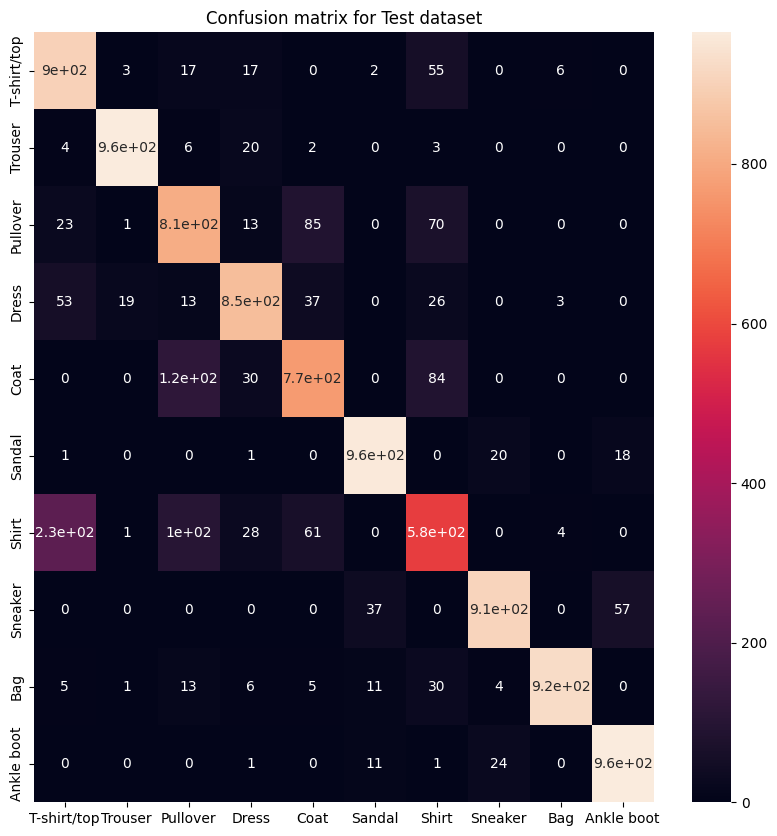

In [50]:
plot_local_confmat(y_t, y_pred)

<h1>8. Comparing Squared loss and Cross Entropy loss</h1>



---

- Here we are trying to compare which loss function is better, i.e., `cross-entropy loss` or `squared loss`.
  
- We again run a hyperparameter sweep, but this time also including the loss function as one of the hyperparameters. Using this, we can easily compare both loss functions at once and arrive at a correct decision.
  
- We have not used the `bayes` method here and preferred the `random` method because the "bayes" method is kind of heuristic and will slowly stop using the loss function that is not performing well.

---


In [51]:
def compare():
    """
    Compares different loss functions by running a hyperparameter sweep with Weights & Biases (wandb).
    Logs the training progress and results to the wandb workspace.
    """

    # Define default hyperparameters for the wandb sweep
    config_defaults = {
        'number_hidden_layers': 2,
        'number_neurons': 32,
        'learning_rate': 0.001,
        'initialization_type': "xavier",
        'activation_function': 'sigmoid',
        'mini_batch_size': 64,
        'max_epochs': 5,
        'lambd': 0,
        'optimization_function': "adam",
        'loss_function': "cross_entropy"
    }

    # Initialize the wandb run with the default hyperparameters
    wandb.init(config=config_defaults)
    config = wandb.config

    # Construct the layer sizes (architecture) of the neural network
    layer_sizes = [784]  # Assuming 784 input features (e.g., 28x28 pixels for MNIST)
    for i in range(config.number_hidden_layers):
        layer_sizes.append(config.number_neurons)
    layer_sizes.append(10)  # Assuming 10 output classes

    # Collect hyperparameters from the wandb configuration
    learning_rate = config.learning_rate
    initialization_type = config.initialization_type
    activation_function = config.activation_function
    loss_function = config.loss_function
    mini_batch_size = config.mini_batch_size
    max_epochs = config.max_epochs
    lambd = config.lambd
    opt_fun = config.optimization_function

    # Select the optimization function based on the configuration
    optimization_function = globals().get(opt_fun)
    if optimization_function is None:
        print("Wrong optimization function")
        exit()

    # Set a meaningful name for the wandb run using the hyperparameters
    name_run = f"{learning_rate}_{initialization_type[0]}_{activation_function[0]}_{mini_batch_size}_{max_epochs}_{lambd}_{opt_fun[:4]}"
    wandb.run.name = name_run

    # Set this to True to log the data to wandb
    wandb_log = True

    # Train the neural network with the current hyperparameters
    parameters = fit(X_train, y_train, layer_sizes, wandb_log, learning_rate,
                     initialization_type, activation_function, loss_function,
                     mini_batch_size, max_epochs, lambd, optimization_function)

    # Save and finish the wandb run
    wandb.run.save()
    wandb.run.finish()


https://www.kaggle.com/code/aritrag/hyperparameter-optimization-with-w-b-sweeps

In [52]:
def loss_compare_sweeper(entity_name, project_name):
    """
    Sets up and runs a hyperparameter sweep with Weights & Biases (wandb) to compare different loss functions.

    Args:
        entity_name (str): The name of the entity (user or team) in wandb.
        project_name (str): The name of the project in wandb.
    """

    # Define the hyperparameter space for the sweep
    hyperparameters = {
        "learning_rate": {
            'values': [0.001, 0.0001]
        },
        "number_hidden_layers": {
            'values': [3, 4, 5]
        },
        "number_neurons": {
            'values': [32, 64, 128]
        },
        "initialization_type": {
            'values': ["xavier", "random"]
        },
        "activation_function": {
            'values': ["sigmoid", "tanh", "relu"]
        },
        "mini_batch_size": {
            'values': [16, 32, 64]
        },
        "max_epochs": {
            'values': [5, 10, 15]
        },
        "lambd": {
            'values': [0, 0.0005, 0.5]
        },
        "optimization_function": {
            'values': ["mini_batch_gd", "momentum_gd", "nesterov_gd", "rmsprop", "adam", "nadam"]
        },
        "loss_function": {
            'values': ["cross_entropy", "squared_loss"]
        }
    }

    # Configure the sweep using the random search method
    sweep_config = {
        'method': 'random',
        'metric': {
            'name': 'Validation_Accuracy',
            'goal': 'maximize'
        },
        'parameters': hyperparameters
    }

    # Create the sweep in wandb
    sweep_id = wandb.sweep(sweep_config, entity=entity_name, project=project_name)

    # Run the sweep with the compare function as the agent function, limited to 50 runs
    wandb.agent(sweep_id, compare, count=50)


In [53]:
loss_compare_sweeper(entity_name,project_name)

Create sweep with ID: vdfyyqly
Sweep URL: https://wandb.ai/ahmecse/GPT100/sweeps/vdfyyqly


wandb: Agent Starting Run: hcj9er54 with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: random
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 3
wandb: 	number_neurons: 32
wandb: 	optimization_function: adam


100%|██████████| 5/5 [02:31<00:00, 30.36s/it]


Training Accuracy: 29.87037037037037
Validation Accuracy: 31.1


Train_Accuracy,▁▂▅██
Train_Loss,█▅▄▂▁
Validation_Accuracy,▁▂▅██
Validation_loss,█▅▄▂▁
epoch,▁▃▅▆█
Train_Accuracy,29.87037
Train_Loss,1.59774
Validation_Accuracy,31.1
Validation_loss,1.59256
epoch,4


wandb: Agent Starting Run: zq0yyqcs with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 15
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 64
wandb: 	optimization_function: rmsprop


 73%|███████▎  | 11/15 [06:44<02:26, 36.57s/it]<ipython-input-24-f21e966d103f>:10: RuntimeWarning: divide by zero encountered in log
  error = - np.sum( np.multiply(y , np.log(y_hat)))/len(y)
<ipython-input-24-f21e966d103f>:10: RuntimeWarning: invalid value encountered in multiply
  error = - np.sum( np.multiply(y , np.log(y_hat)))/len(y)
 80%|████████  | 12/15 [07:21<01:50, 36.69s/it]<ipython-input-30-5c24b31454bc>:29: RuntimeWarning: invalid value encountered in divide
  grad["dh"+str(len(layer_sizes)-1)] = -(y/y_hat)
100%|██████████| 15/15 [09:09<00:00, 36.65s/it]


Training Accuracy: 89.39259259259259
Validation Accuracy: 87.1


Train_Accuracy,▁▄▄▄▇▇▇██▇█▇██▇
Train_Loss,█▅▅▆▂▂▂▁▂▂▂
Validation_Accuracy,▁▄▅▅▇▇▇██▇█▇▇█▇
Validation_loss,█▃▄▆▂▃▃▁▃▅▄▇▅
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
Train_Accuracy,89.39259
Train_Loss,nan
Validation_Accuracy,87.1
Validation_loss,nan
epoch,14


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lrcjv54m with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 15
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: nesterov_gd


  7%|▋         | 1/15 [00:35<08:20, 35.75s/it]<ipython-input-17-b8dd0529f310>:10: RuntimeWarning: overflow encountered in exp
  return(np.exp(x)/np.sum(np.exp(x)))
<ipython-input-17-b8dd0529f310>:10: RuntimeWarning: invalid value encountered in divide
  return(np.exp(x)/np.sum(np.exp(x)))
100%|██████████| 15/15 [08:17<00:00, 33.19s/it]


Training Accuracy: 10.048148148148147
Validation Accuracy: 9.566666666666666


Train_Accuracy,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Train_Loss,▁
Validation_Accuracy,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation_loss,▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
Train_Accuracy,10.04815
Train_Loss,nan
Validation_Accuracy,9.56667
Validation_loss,nan
epoch,14


wandb: Agent Starting Run: vllft3o3 with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 128
wandb: 	optimization_function: nesterov_gd


100%|██████████| 5/5 [07:18<00:00, 87.69s/it]


Training Accuracy: 72.24444444444444
Validation Accuracy: 72.51666666666667


Train_Accuracy,▁▃▆▇█
Train_Loss,█▆▃▂▁
Validation_Accuracy,▁▃▆▇█
Validation_loss,█▆▃▂▁
epoch,▁▃▅▆█
Train_Accuracy,72.24444
Train_Loss,0.17822
Validation_Accuracy,72.51667
Validation_loss,0.17773
epoch,4


wandb: Agent Starting Run: qo0bzlxr with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: rmsprop


100%|██████████| 10/10 [07:24<00:00, 44.41s/it]


Training Accuracy: 89.4537037037037
Validation Accuracy: 87.25


Train_Accuracy,▁▃▅▆▆▇▇▇██
Train_Loss,█▆▄▃▃▂▂▂▁▁
Validation_Accuracy,▁▃▅▆▆▇▇▇██
Validation_loss,█▅▄▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,89.4537
Train_Loss,0.29527
Validation_Accuracy,87.25
Validation_loss,0.40341
epoch,9


wandb: Agent Starting Run: 5yfbdfjs with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 128
wandb: 	optimization_function: nadam


100%|██████████| 5/5 [08:03<00:00, 96.64s/it]


Training Accuracy: 10.035185185185187
Validation Accuracy: 9.683333333333334


Train_Accuracy,▁▁▁██
Train_Loss,██▄▂▁
Validation_Accuracy,███▁▁
Validation_loss,▇█▄▂▁
epoch,▁▃▅▆█
Train_Accuracy,10.03519
Train_Loss,0.45047
Validation_Accuracy,9.68333
Validation_loss,0.4505
epoch,4


wandb: Agent Starting Run: hsa246du with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 3
wandb: 	number_neurons: 32
wandb: 	optimization_function: adam


100%|██████████| 5/5 [02:16<00:00, 27.38s/it]


Training Accuracy: 86.4462962962963
Validation Accuracy: 85.45


Train_Accuracy,▁▄▆▇█
Train_Loss,█▅▃▂▁
Validation_Accuracy,▁▄▅▇█
Validation_loss,█▅▃▂▁
epoch,▁▃▅▆█
Train_Accuracy,86.4463
Train_Loss,0.09826
Validation_Accuracy,85.45
Validation_loss,0.1037
epoch,4


wandb: Agent Starting Run: 8xxu9c9n with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 128
wandb: 	optimization_function: mini_batch_gd


  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-17-b8dd0529f310>:10: RuntimeWarning: divide by zero encountered in divide
  return(np.exp(x)/np.sum(np.exp(x)))
<ipython-input-17-b8dd0529f310>:10: RuntimeWarning: overflow encountered in divide
  return(np.exp(x)/np.sum(np.exp(x)))
100%|██████████| 10/10 [12:04<00:00, 72.45s/it]


Training Accuracy: 10.048148148148147
Validation Accuracy: 9.566666666666666


Train_Accuracy,▁▁▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,10.04815
Train_Loss,nan
Validation_Accuracy,9.56667
Validation_loss,nan
epoch,9


wandb: Agent Starting Run: vmo8x4tn with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: random
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: nadam


100%|██████████| 5/5 [04:39<00:00, 55.92s/it]


Training Accuracy: 74.15555555555555
Validation Accuracy: 74.11666666666666


Train_Accuracy,▁▅▇██
Train_Loss,█▄▃▂▁
Validation_Accuracy,▁▅▇▇█
Validation_loss,█▄▃▂▁
epoch,▁▃▅▆█
Train_Accuracy,74.15556
Train_Loss,0.71314
Validation_Accuracy,74.11667
Validation_loss,0.70894
epoch,4


wandb: Agent Starting Run: nzx7xiea with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: random
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: mini_batch_gd


100%|██████████| 10/10 [04:36<00:00, 27.65s/it]


Training Accuracy: 10.048148148148147
Validation Accuracy: 9.566666666666666


Train_Accuracy,▁▁▁▁▁▁▁▁▁▁
Train_Loss,▃█▆▆▅▅▃▃▁▁
Validation_Accuracy,▁▁▁▁▁▁▁▁▁▁
Validation_loss,▁█▆▆▆▅▅▃▃▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,10.04815
Train_Loss,2.30266
Validation_Accuracy,9.56667
Validation_loss,2.30263
epoch,9


wandb: Agent Starting Run: v76uk30w with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: momentum_gd


100%|██████████| 10/10 [05:56<00:00, 35.61s/it]


Training Accuracy: 83.72407407407407
Validation Accuracy: 83.36666666666666


Train_Accuracy,▁▄▆▆▇▇▇███
Train_Loss,█▄▃▂▂▂▁▁▁▁
Validation_Accuracy,▁▄▆▆▇▇████
Validation_loss,█▄▃▂▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,83.72407
Train_Loss,0.4692
Validation_Accuracy,83.36667
Validation_loss,0.5159
epoch,9


wandb: Agent Starting Run: g99i6kq2 with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: random
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 15
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: momentum_gd


100%|██████████| 15/15 [08:42<00:00, 34.85s/it]


Training Accuracy: 53.11851851851852
Validation Accuracy: 53.41666666666667


Train_Accuracy,▁▁▁▁▁▁▁▁▁▁▁▂▅▇█
Train_Loss,████████████▅▂▁
Validation_Accuracy,▁▁▁▁▁▁▁▁▁▁▁▂▅▇█
Validation_loss,████████████▅▂▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
Train_Accuracy,53.11852
Train_Loss,1.07086
Validation_Accuracy,53.41667
Validation_loss,1.08017
epoch,14


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8ft1ue1x with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 3
wandb: 	number_neurons: 128
wandb: 	optimization_function: nadam


100%|██████████| 10/10 [12:00<00:00, 72.01s/it]


Training Accuracy: 90.99814814814815
Validation Accuracy: 88.6


Train_Accuracy,▁▄▅▆▇▇▇███
Train_Loss,█▅▄▃▂▂▂▁▁▁
Validation_Accuracy,▁▅▆▇▇▇████
Validation_loss,█▅▃▃▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,90.99815
Train_Loss,0.06746
Validation_Accuracy,88.6
Validation_loss,0.08328
epoch,9


wandb: Agent Starting Run: f7h0uiex with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 3
wandb: 	number_neurons: 32
wandb: 	optimization_function: adam


100%|██████████| 5/5 [02:53<00:00, 34.75s/it]


Training Accuracy: 67.93333333333334
Validation Accuracy: 68.58333333333333


Train_Accuracy,▁▅▆▇█
Train_Loss,█▅▄▂▁
Validation_Accuracy,▁▅▆▇█
Validation_loss,█▅▄▂▁
epoch,▁▃▅▆█
Train_Accuracy,67.93333
Train_Loss,0.28252
Validation_Accuracy,68.58333
Validation_loss,0.28164
epoch,4


wandb: Agent Starting Run: qews5pgi with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: nadam


100%|██████████| 10/10 [07:52<00:00, 47.28s/it]


Training Accuracy: 86.13148148148149
Validation Accuracy: 85.2


Train_Accuracy,▁▅▆▇▇▇████
Train_Loss,█▄▃▂▂▂▂▁▁▁
Validation_Accuracy,▁▅▆▆▇▇████
Validation_loss,█▄▃▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,86.13148
Train_Loss,0.10063
Validation_Accuracy,85.2
Validation_loss,0.10734
epoch,9


wandb: Agent Starting Run: tt5714dq with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: mini_batch_gd


100%|██████████| 5/5 [05:40<00:00, 68.13s/it]


Training Accuracy: 22.066666666666666
Validation Accuracy: 22.15


Train_Accuracy,▁▂▃▆█
Train_Loss,█▇▅▃▁
Validation_Accuracy,▁▂▃▅█
Validation_loss,█▇▅▃▁
epoch,▁▃▅▆█
Train_Accuracy,22.06667
Train_Loss,0.44928
Validation_Accuracy,22.15
Validation_loss,0.44929
epoch,4


wandb: Agent Starting Run: w43wzkqh with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 15
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: nadam


100%|██████████| 15/15 [13:35<00:00, 54.35s/it]


Training Accuracy: 90.14814814814814
Validation Accuracy: 87.63333333333333


Train_Accuracy,▁▄▆▆▇▇▇▇███████
Train_Loss,█▄▃▃▂▂▂▂▁▁▁▁▁▁▁
Validation_Accuracy,▁▄▆▇▇▇▇████████
Validation_loss,█▅▄▃▂▂▂▂▁▁▁▁▁▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
Train_Accuracy,90.14815
Train_Loss,0.28514
Validation_Accuracy,87.63333
Validation_loss,0.36656
epoch,14


wandb: Agent Starting Run: ba6q5g96 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: mini_batch_gd


100%|██████████| 10/10 [07:04<00:00, 42.48s/it]


Training Accuracy: 88.48888888888888
Validation Accuracy: 86.3


Train_Accuracy,▁▃▅▆▇▇▇▇▇█
Train_Loss,█▆▄▃▂▂▂▂▂▁
Validation_Accuracy,▁▃▅▆▇▇████
Validation_loss,█▆▃▂▂▂▁▂▂▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,88.48889
Train_Loss,0.3081
Validation_Accuracy,86.3
Validation_loss,0.37723
epoch,9


wandb: Agent Starting Run: ggtakukv with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: momentum_gd


100%|██████████| 10/10 [07:13<00:00, 43.37s/it]


Training Accuracy: 89.45555555555555
Validation Accuracy: 87.26666666666667


Train_Accuracy,▁▃▄▆▇▇▇███
Train_Loss,█▆▄▃▂▂▂▁▁▁
Validation_Accuracy,▁▃▄▆▇▇▇███
Validation_loss,█▅▄▂▂▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,89.45556
Train_Loss,0.28601
Validation_Accuracy,87.26667
Validation_loss,0.4018
epoch,9


wandb: Agent Starting Run: tafzyy0f with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 15
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 128
wandb: 	optimization_function: momentum_gd


100%|██████████| 15/15 [16:56<00:00, 67.73s/it]


Training Accuracy: 91.95
Validation Accuracy: 88.58333333333334


Train_Accuracy,▁▃▄▅▆▆▆▆▇▇▇▇███
Train_Loss,█▆▅▄▃▃▃▃▂▂▂▂▁▁▁
Validation_Accuracy,▁▄▄▆▆▇▇▇▇▇▇▇█▇█
Validation_loss,█▅▄▃▂▂▂▂▁▁▁▁▁▂▂
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
Train_Accuracy,91.95
Train_Loss,0.21451
Validation_Accuracy,88.58333
Validation_loss,0.3315
epoch,14


wandb: Agent Starting Run: 2jencv3v with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: random
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 15
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 3
wandb: 	number_neurons: 128
wandb: 	optimization_function: adam


100%|██████████| 15/15 [17:06<00:00, 68.43s/it]


Training Accuracy: 80.03888888888889
Validation Accuracy: 80.25


Train_Accuracy,▁▁▄▅▅▅▆▆▆▆▇▇▇██
Train_Loss,█▇▅▄▄▃▃▃▃▃▂▂▂▁▁
Validation_Accuracy,▁▁▄▅▅▅▆▆▆▆▇▇▇██
Validation_loss,█▇▅▄▄▃▃▃▃▃▂▂▂▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
Train_Accuracy,80.03889
Train_Loss,0.14315
Validation_Accuracy,80.25
Validation_loss,0.14565
epoch,14


wandb: Agent Starting Run: j5zfogjk with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: xavier
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: nesterov_gd


100%|██████████| 10/10 [06:34<00:00, 39.44s/it]


Training Accuracy: 79.26666666666667
Validation Accuracy: 78.45


Train_Accuracy,▁▄▅▆▆▇▇▇██
Train_Loss,█▆▄▃▂▂▂▁▁▁
Validation_Accuracy,▁▄▅▆▇▇▇▇██
Validation_loss,█▆▄▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,79.26667
Train_Loss,0.15495
Validation_Accuracy,78.45
Validation_loss,0.15831
epoch,9


wandb: Agent Starting Run: ahiinonb with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: mini_batch_gd


100%|██████████| 10/10 [09:49<00:00, 58.97s/it]


Training Accuracy: 25.93888888888889
Validation Accuracy: 27.116666666666667


Train_Accuracy,▁▁▂▂▃▄▅██▇
Train_Loss,██▇▇▇▆▅▄▃▁
Validation_Accuracy,▁▁▂▂▃▃▅██▇
Validation_loss,██▇▇▇▆▅▄▃▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,25.93889
Train_Loss,0.44511
Validation_Accuracy,27.11667
Validation_loss,0.44506
epoch,9


wandb: Agent Starting Run: n18z8d29 with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: xavier
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 3
wandb: 	number_neurons: 128
wandb: 	optimization_function: adam


100%|██████████| 10/10 [12:40<00:00, 76.08s/it]


Training Accuracy: 81.52592592592592
Validation Accuracy: 81.35


Train_Accuracy,▁▃▄▅▆▇▇▇██
Train_Loss,█▅▄▃▂▂▂▁▁▁
Validation_Accuracy,▁▃▄▅▆▆▇▇██
Validation_loss,█▅▄▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,81.52593
Train_Loss,0.53368
Validation_Accuracy,81.35
Validation_loss,0.5359
epoch,9


wandb: Agent Starting Run: hhayhue2 with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: nesterov_gd


100%|██████████| 5/5 [04:35<00:00, 55.03s/it]


Training Accuracy: 16.17037037037037
Validation Accuracy: 15.733333333333333


Train_Accuracy,▂▁▆▆█
Train_Loss,█▂▂▁▁
Validation_Accuracy,▂▁▆▆█
Validation_loss,█▂▂▁▁
epoch,▁▃▅▆█
Train_Accuracy,16.17037
Train_Loss,0.44978
Validation_Accuracy,15.73333
Validation_loss,0.4498
epoch,4


wandb: Agent Starting Run: ibm6an1n with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: rmsprop


100%|██████████| 10/10 [09:22<00:00, 56.26s/it]


Training Accuracy: 90.16296296296296
Validation Accuracy: 87.75


Train_Accuracy,▁▄▅▆▆▇▇▇██
Train_Loss,█▅▄▃▃▂▂▂▁▁
Validation_Accuracy,▁▄▅▆▇▇▇███
Validation_loss,█▅▄▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,90.16296
Train_Loss,0.28018
Validation_Accuracy,87.75
Validation_loss,0.38356
epoch,9


wandb: Agent Starting Run: ywwekv16 with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: random
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: adam


100%|██████████| 5/5 [03:55<00:00, 47.20s/it]


Training Accuracy: 10.05
Validation Accuracy: 9.55


Train_Accuracy,▁▁▁▁▁
Train_Loss,█▅▃▂▁
Validation_Accuracy,▁▁▁▁▁
Validation_loss,█▆▅▃▁
epoch,▁▃▅▆█
Train_Accuracy,10.05
Train_Loss,0.45001
Validation_Accuracy,9.55
Validation_loss,0.45012
epoch,4


wandb: Agent Starting Run: vkoa4jdq with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: random
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: adam


100%|██████████| 5/5 [04:10<00:00, 50.01s/it]


Training Accuracy: 10.05
Validation Accuracy: 9.55


Train_Accuracy,▁████
Train_Loss,█▃▂▂▁
Validation_Accuracy,█▁▁▁▁
Validation_loss,▁▅▆▇█
epoch,▁▃▅▆█
Train_Accuracy,10.05
Train_Loss,2.30259
Validation_Accuracy,9.55
Validation_loss,2.30286
epoch,4


wandb: Agent Starting Run: p8ismgzp with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 128
wandb: 	optimization_function: mini_batch_gd


100%|██████████| 5/5 [06:23<00:00, 76.68s/it]


Training Accuracy: 87.25925925925925
Validation Accuracy: 85.85000000000001


Train_Accuracy,▁▄▆▇█
Train_Loss,█▅▃▂▁
Validation_Accuracy,▁▅▆▇█
Validation_loss,█▄▃▂▁
epoch,▁▃▅▆█
Train_Accuracy,87.25926
Train_Loss,0.09325
Validation_Accuracy,85.85
Validation_loss,0.10238
epoch,4


wandb: Agent Starting Run: mp06txz2 with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: random
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 15
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 3
wandb: 	number_neurons: 64
wandb: 	optimization_function: nesterov_gd


100%|██████████| 15/15 [09:35<00:00, 38.39s/it]


Training Accuracy: 88.08518518518518
Validation Accuracy: 86.83333333333333


Train_Accuracy,▁▃▇▇███████████
Train_Loss,█▇▃▂▂▁▁▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▃▇▇███████████
Validation_loss,█▇▃▂▂▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
Train_Accuracy,88.08519
Train_Loss,0.08554
Validation_Accuracy,86.83333
Validation_loss,0.09636
epoch,14


wandb: Agent Starting Run: 8ofaoo66 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: rmsprop


100%|██████████| 5/5 [03:04<00:00, 36.92s/it]


Training Accuracy: 86.42222222222222
Validation Accuracy: 84.68333333333334


Train_Accuracy,▁▅▇██
Train_Loss,█▄▁▁▂
Validation_Accuracy,▁▅▇█▇
Validation_loss,█▃▁▁▃
epoch,▁▃▅▆█
Train_Accuracy,86.42222
Train_Loss,0.38965
Validation_Accuracy,84.68333
Validation_loss,0.45322
epoch,4


wandb: Agent Starting Run: l7i6m4w3 with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: random
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 128
wandb: 	optimization_function: mini_batch_gd


100%|██████████| 5/5 [06:26<00:00, 77.31s/it]


Training Accuracy: 10.05
Validation Accuracy: 9.55


Train_Accuracy,▁▁▁▁█
Train_Loss,█▄▃▂▁
Validation_Accuracy,████▁
Validation_loss,█▃▂▂▁
epoch,▁▃▅▆█
Train_Accuracy,10.05
Train_Loss,0.45
Validation_Accuracy,9.55
Validation_loss,0.45002
epoch,4


wandb: Agent Starting Run: giftqbhk with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 15
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 128
wandb: 	optimization_function: adam


100%|██████████| 15/15 [19:22<00:00, 77.52s/it]


Training Accuracy: 10.048148148148147
Validation Accuracy: 9.566666666666666


Train_Accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
Train_Accuracy,10.04815
Train_Loss,nan
Validation_Accuracy,9.56667
Validation_loss,nan
epoch,14


wandb: Agent Starting Run: 9gecmyw5 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: random
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 3
wandb: 	number_neurons: 64
wandb: 	optimization_function: momentum_gd


100%|██████████| 10/10 [05:49<00:00, 34.92s/it]


Training Accuracy: 10.048148148148147
Validation Accuracy: 9.566666666666666


Train_Accuracy,▁▁▁▁▁▁▁▁▁▁
Train_Loss,██▁
Validation_Accuracy,▁▁▁▁▁▁▁▁▁▁
Validation_loss,██▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,10.04815
Train_Loss,nan
Validation_Accuracy,9.56667
Validation_loss,nan
epoch,9


wandb: Agent Starting Run: i7g71hgj with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 15
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 3
wandb: 	number_neurons: 128
wandb: 	optimization_function: rmsprop


100%|██████████| 15/15 [15:06<00:00, 60.43s/it]


Training Accuracy: 90.8111111111111
Validation Accuracy: 87.94999999999999


Train_Accuracy,▁▃▄▅▆▆▆▇▇▇▇████
Train_Loss,█▆▄▄▃▃▂▂▂▂▁▁▁▁▁
Validation_Accuracy,▁▄▅▅▇▇▇▇▇▇█████
Validation_loss,█▄▃▂▁▁▁▁▂▂▁▁▂▂▃
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
Train_Accuracy,90.81111
Train_Loss,0.27742
Validation_Accuracy,87.95
Validation_loss,0.45517
epoch,14


wandb: Agent Starting Run: xo0ruc9h with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: random
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 15
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: momentum_gd


100%|██████████| 15/15 [12:56<00:00, 51.74s/it]


Training Accuracy: 9.96111111111111
Validation Accuracy: 10.35


Train_Accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Train_Loss,█▇▇▆▆▅▄▄▄▃▃▂▂▁▁
Validation_Accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation_loss,█▇▇▆▆▅▄▄▃▃▃▂▂▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
Train_Accuracy,9.96111
Train_Loss,2.30448
Validation_Accuracy,10.35
Validation_loss,2.3047
epoch,14


wandb: Agent Starting Run: gfmo74uf with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: random
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 15
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 128
wandb: 	optimization_function: adam


100%|██████████| 15/15 [19:56<00:00, 79.80s/it]


Training Accuracy: 69.06851851851852
Validation Accuracy: 69.88333333333333


Train_Accuracy,▁▂▃▆▃▅▆▆▆▆▇▇▇▇█
Train_Loss,█▇▆▆▇▆▆▅▃▄▃▃▂▂▁
Validation_Accuracy,▁▂▃▆▃▅▆▆▆▆▇▇▇▇█
Validation_loss,█▇▆▆▇▆▆▅▃▄▃▃▂▂▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
Train_Accuracy,69.06852
Train_Loss,0.19164
Validation_Accuracy,69.88333
Validation_loss,0.19285
epoch,14


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: mjw0p32n with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: random
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 64
wandb: 	optimization_function: momentum_gd


100%|██████████| 5/5 [03:34<00:00, 42.87s/it]


Training Accuracy: 9.96111111111111
Validation Accuracy: 10.35


Train_Accuracy,▁▁▁▁▁
Train_Loss,▁▁▁▁▁
Validation_Accuracy,▁▁▁▁▁
Validation_loss,▁▁▁▁▁
epoch,▁▃▅▆█
Train_Accuracy,9.96111
Train_Loss,2.30466
Validation_Accuracy,10.35
Validation_loss,2.30471
epoch,4


wandb: Agent Starting Run: skgy2o47 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: random
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 15
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 3
wandb: 	number_neurons: 128
wandb: 	optimization_function: nesterov_gd


100%|██████████| 15/15 [13:36<00:00, 54.40s/it]


Training Accuracy: 89.18703703703704
Validation Accuracy: 86.8


Train_Accuracy,▁▂▅▅▇▇█████████
Train_Loss,██▄▃▂▂▂▁▁▁▁▁▁▁▁
Validation_Accuracy,▁▂▅▅▇▇█████████
Validation_loss,██▄▃▂▂▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
Train_Accuracy,89.18704
Train_Loss,0.2964
Validation_Accuracy,86.8
Validation_loss,0.3597
epoch,14


wandb: Agent Starting Run: sqzfquj9 with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: random
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 15
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 128
wandb: 	optimization_function: rmsprop


100%|██████████| 15/15 [18:24<00:00, 73.64s/it]


Training Accuracy: 88.51481481481481
Validation Accuracy: 86.3


Train_Accuracy,▁▄▅▆▇▇▇███████▇
Train_Loss,█▅▄▃▂▂▂▁▁▁▁
Validation_Accuracy,▁▅▆▇▇█▇█▇██████
Validation_loss,█▄▃▂▁▁▂▁▁▂▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
Train_Accuracy,88.51481
Train_Loss,nan
Validation_Accuracy,86.3
Validation_loss,nan
epoch,14


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vo5dhmtk with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 15
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 3
wandb: 	number_neurons: 32
wandb: 	optimization_function: mini_batch_gd


100%|██████████| 15/15 [06:12<00:00, 24.83s/it]


Training Accuracy: 86.83518518518518
Validation Accuracy: 85.35000000000001


Train_Accuracy,▁▃▅▅▆▆▇▇▇▇▇████
Train_Loss,█▆▄▄▃▃▂▂▂▂▂▁▁▁▁
Validation_Accuracy,▁▄▅▆▆▆▇▇▇▇▇████
Validation_loss,█▅▄▄▃▃▂▂▂▂▂▁▁▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
Train_Accuracy,86.83519
Train_Loss,0.37279
Validation_Accuracy,85.35
Validation_loss,0.4147
epoch,14


wandb: Agent Starting Run: swnplqki with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: random
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 128
wandb: 	optimization_function: adam


100%|██████████| 10/10 [12:42<00:00, 76.20s/it]


Training Accuracy: 65.29074074074074
Validation Accuracy: 65.10000000000001


Train_Accuracy,▁▄▅▅▆▇▇▇██
Train_Loss,█▆▅▄▃▃▂▂▁▁
Validation_Accuracy,▁▄▅▆▆▆▇▇██
Validation_loss,█▆▅▄▃▃▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,65.29074
Train_Loss,0.87315
Validation_Accuracy,65.1
Validation_loss,0.86727
epoch,9


wandb: Agent Starting Run: u88az0eg with config:
wandb: 	activation_function: relu
wandb: 	initialization_type: random
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: momentum_gd


100%|██████████| 10/10 [06:01<00:00, 36.11s/it]


Training Accuracy: 10.05
Validation Accuracy: 9.55


Train_Accuracy,▁█████████
Train_Loss,█▄▂▂▁▁▁▁▁▁
Validation_Accuracy,█▁▁▁▁▁▁▁▁▁
Validation_loss,▁▃▅▆▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,10.05
Train_Loss,0.45
Validation_Accuracy,9.55
Validation_loss,0.45002
epoch,9


wandb: Agent Starting Run: bvs5ikji with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: random
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: nesterov_gd


100%|██████████| 5/5 [03:13<00:00, 38.79s/it]


Training Accuracy: 9.96111111111111
Validation Accuracy: 10.35


Train_Accuracy,▁▁▁▁▁
Train_Loss,█▁▂▁▁
Validation_Accuracy,▁▁▁▁▁
Validation_loss,█▂▂▁▁
epoch,▁▃▅▆█
Train_Accuracy,9.96111
Train_Loss,0.45015
Validation_Accuracy,10.35
Validation_loss,0.45013
epoch,4


wandb: Agent Starting Run: ryahaops with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: random
wandb: 	lambd: 0.5
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_loss
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 3
wandb: 	number_neurons: 64
wandb: 	optimization_function: adam


100%|██████████| 5/5 [03:28<00:00, 41.76s/it]


Training Accuracy: 87.75740740740741
Validation Accuracy: 86.48333333333333


Train_Accuracy,▁▅▇▇█
Train_Loss,█▅▂▂▁
Validation_Accuracy,▁▅▇▇█
Validation_loss,█▅▂▂▁
epoch,▁▃▅▆█
Train_Accuracy,87.75741
Train_Loss,0.09192
Validation_Accuracy,86.48333
Validation_loss,0.10715
epoch,4


wandb: Agent Starting Run: ksz8j79f with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 32
wandb: 	optimization_function: nadam


100%|██████████| 5/5 [03:55<00:00, 47.06s/it]


Training Accuracy: 86.38703703703705
Validation Accuracy: 85.05


Train_Accuracy,▁▆███
Train_Loss,█▃▂▁▁
Validation_Accuracy,▁▆▇██
Validation_loss,█▃▂▁▁
epoch,▁▃▅▆█
Train_Accuracy,86.38704
Train_Loss,0.39513
Validation_Accuracy,85.05
Validation_loss,0.43715
epoch,4


wandb: Agent Starting Run: ablpsc1s with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: xavier
wandb: 	lambd: 0
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 10
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 5
wandb: 	number_neurons: 128
wandb: 	optimization_function: mini_batch_gd


100%|██████████| 10/10 [13:48<00:00, 82.84s/it]


Training Accuracy: 37.00185185185185
Validation Accuracy: 37.68333333333334


Train_Accuracy,▁▁▂▂▃▅▆███
Train_Loss,███▇▇▇▆▅▄▁
Validation_Accuracy,▁▁▂▂▃▅▆███
Validation_loss,███▇▇▇▆▅▄▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,37.00185
Train_Loss,2.15463
Validation_Accuracy,37.68333
Validation_loss,2.15163
epoch,9


wandb: Agent Starting Run: gb9ltghw with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: random
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 64
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 64
wandb: 	optimization_function: mini_batch_gd


100%|██████████| 5/5 [03:10<00:00, 38.08s/it]


Training Accuracy: 10.048148148148147
Validation Accuracy: 9.566666666666666


Train_Accuracy,▁▁▁▁▁
Train_Loss,█▇▅▃▁
Validation_Accuracy,▁▁▁▁▁
Validation_loss,█▇▅▃▁
epoch,▁▃▅▆█
Train_Accuracy,10.04815
Train_Loss,2.30265
Validation_Accuracy,9.56667
Validation_loss,2.30263
epoch,4


wandb: Agent Starting Run: 3kcdkc3l with config:
wandb: 	activation_function: tanh
wandb: 	initialization_type: xavier
wandb: 	lambd: 0.0005
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 5
wandb: 	mini_batch_size: 16
wandb: 	number_hidden_layers: 4
wandb: 	number_neurons: 32
wandb: 	optimization_function: nadam


100%|██████████| 5/5 [02:42<00:00, 32.47s/it]


Training Accuracy: 87.86851851851853
Validation Accuracy: 86.66666666666667


Train_Accuracy,▁▅▆▇█
Train_Loss,█▄▃▂▁
Validation_Accuracy,▁▄▆▇█
Validation_loss,█▄▂▂▁
epoch,▁▃▅▆█
Train_Accuracy,87.86852
Train_Loss,0.34032
Validation_Accuracy,86.66667
Validation_loss,0.37648
epoch,4


wandb: Agent Starting Run: yax2v821 with config:
wandb: 	activation_function: sigmoid
wandb: 	initialization_type: random
wandb: 	lambd: 0
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	max_epochs: 15
wandb: 	mini_batch_size: 32
wandb: 	number_hidden_layers: 3
wandb: 	number_neurons: 128
wandb: 	optimization_function: mini_batch_gd


100%|██████████| 15/15 [14:52<00:00, 59.50s/it]


Training Accuracy: 9.96111111111111
Validation Accuracy: 10.35


Train_Accuracy,▁▁▁▁▁██████████
Train_Loss,█▆▅▄▃▃▂▂▂▁▁▁▁▁▁
Validation_Accuracy,█████▁▁▁▁▁▁▁▁▁▁
Validation_loss,█▆▅▄▃▃▂▂▂▂▂▂▁▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
Train_Accuracy,9.96111
Train_Loss,2.30359
Validation_Accuracy,10.35
Validation_loss,2.3032
epoch,14


<h1>10. MNIST Trials </h1>


---

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

It contains 60,000 training images and 10,000 testing images. Each image is of the size 28*28 pixels.

Source: [MNIST database - Wikipedia](https://en.wikipedia.org/wiki/MNIST_database)

We are using the hyperparameters tuned for the Fashion-MNIST dataset and trying to build models to recognize the handwritten digits of the MNIST Dataset.

The main aim is to check whether the learnings from one image classification task can be applied to another task or not.

---


In [54]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
# sklearn library is used only for train-test-validation split

def prepare_data_mnist():
    """
    Prepares the MNIST dataset for training a neural network.

    Loads the dataset, performs train-test-validation split, normalizes the data,
    flattens each image, and converts the class labels to one-hot encoded vectors.

    Returns:
        tuple: Split datasets (X_train, X_val, X_test, y_train, y_val, y_test) and class labels.
    """

    # Load data from online source
    (train_x, train_y), (test_x, test_y) = mnist.load_data()

    # Define labels for data
    num_classes = 10
    labels = [i for i in range(10)]

    # Print initial data points count
    print("Number of data points in train data (initially) - ", len(train_x))
    print("Number of data points in test data (initially) - ", len(test_x))

    # Perform train-validation split
    train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=40)
    print("Shape of each image - 28x28")
    image_shape = train_x.shape[1] * train_x.shape[2]
    print("Shape of each image (1D) - ", image_shape)

    # Store the number of points in each set
    train_image_count = len(train_x)
    val_image_count = len(val_x)
    test_image_count = len(test_x)

    # Create matrices of image data, flatten images, and normalize
    X_train = np.zeros((train_image_count, image_shape))
    X_val = np.zeros((val_image_count, image_shape))
    X_test = np.zeros((test_image_count, image_shape))

    for i in range(train_image_count):
        X_train[i] = train_x[i].flatten() / 255.0
    for i in range(val_image_count):
        X_val[i] = val_x[i].flatten() / 255.0
    for i in range(test_image_count):
        X_test[i] = test_x[i].flatten() / 255.0

    # One-hot encode the label vectors
    y_train = np.zeros((train_y.size, num_classes))
    y_train[np.arange(train_y.size), train_y] = 1

    y_val = np.zeros((val_y.size, num_classes))
    y_val[np.arange(val_y.size), val_y] = 1

    y_test = np.zeros((test_y.size, num_classes))
    y_test[np.arange(test_y.size), test_y] = 1

    # Return all the datasets along with the labels
    return X_train, X_val, X_test, y_train, y_val, y_test, labels


In [55]:
X_train, X_val, X_test, y_train, y_val, y_test, lab = prepare_data_mnist()

11490434/11490434 [==============================] - 0s 0us/step
Number of data points in train data (initially) -  60000
Number of data points in test data (initially) -  10000
Shape of each image - 28x28
Shape of each image (1D) -  784


In [56]:
def custom_config_mnist(mnist_config,wandb_log, config_number):

  '''This function is used to train the neural network for the given hyperparameter
  configuration and also evaluate the model finally logging the results onto
  Wandb.

  We have essentially used three hyperparameter configurations that were chosen
  after thorough exploration from the Fashion MNIST dataset.'''


  #Forming the network archtecture and storing it in the list.
  num_layers=mnist_config["number_hidden_layers"]
  neurons=mnist_config["number_neurons"]
  layer_sizes = [784]
  for i in range(num_layers):
    layer_sizes = layer_sizes + [neurons]
  layer_sizes  = layer_sizes + [10]

  # For local testing purposes, wandb_log is set to False. Then it doesnt log the
  # results to the wandb workspace. Instead it prints here.
  if (wandb_log== True):
      #initializing the run
      wandb.init(config=mnist_config, project = project_name, entity=entity_name)
      config = wandb.config
      #storing the hyperparameters in local variables
      opt_fun = config.optimization_function

      #Choosing the correct optimization function
      if opt_fun == "adam":
          optimization_function = adam
      elif opt_fun == "nadam":
          optimization_function = nadam
      elif opt_fun == "mini_batch_gd":
          optimization_function = mini_batch_gd
      elif opt_fun == "momentum_gd":
          optimization_function = momentum_gd
      elif opt_fun == "nesterov_gd":
          optimization_function = nesterov_gd
      elif opt_fun == "rmsprop":
          optimization_function = rmsprop
      else:
          print("Wrong optimization function")
          exit()

      wandb.run.name = "Mnist_Config_"+str(config_number)

      #calling the fit function to train the model using the best hyperparamters obtained from above
      parameters = fit(X_train, y_train, layer_sizes,wandb_log,
                     mnist_config["learning_rate"],
                     mnist_config["weight_type"],
                     mnist_config["activation_function"],
                     mnist_config["loss_function"],
                     mnist_config["mini_batch_size"],
                     mnist_config["max_epochs"],
                     mnist_config["lambd"],
                     optimization_function)
      res = predict(X_test,y_test,parameters, mnist_config["activation_function"], layer_sizes)
        # Converting the one hot encoded vectors back to label_id's
      y_t=[]
      for k in range(len(y_test)):
          y_t.append(y_test[k].argmax())

      y_pred=[]
      for k in range(len(res)):
          y_pred.append(res[k].argmax())

      #calculating the test accuracy using the test data
      test_accuracy=calc_test_accuracy(y_pred,y_t)
      print("Test accuracy:",test_accuracy)

      wandb.log({"conf_mat":wandb.plot.confusion_matrix(preds=y_pred,y_true=y_t,class_names=labels),"Test Accuracy": test_accuracy})

      wandb.run.save()
      wandb.run.finish()

  else:
    #Forming the layer_sizes i.e., the architecture of our neural network
      optimizer=mnist_config["optimization_function"]

      if optimizer == "adam":
          opti = adam
      elif optimizer == "nadam":
          opti = nadam
      elif optimizer == "mini_batch_gd":
          opti = mini_batch_gd
      elif optimizer == "momentum_gd":
          opti = momentum_gd
      elif optimizer == "nesterov_gd":
          opti = nesterov_gd
      elif optimizer == "rmsprop":
          opti = rmsprop
      else:
          print("Wrong optimization function")
          exit()

      parameters = fit(X_train, y_train, layer_sizes,wandb_log,
                     mnist_config["learning_rate"],
                     mnist_config["weight_type"],
                     mnist_config["activation_function"],
                     mnist_config["loss_function"],
                     mnist_config["mini_batch_size"],
                     mnist_config["max_epochs"],
                     mnist_config["lambd"],
                     opti)
      res = predict(X_test,y_test,parameters, mnist_config["activation_function"], layer_sizes)

      y_t=[]
      for k in range(len(y_test)):
          y_t.append(y_test[k].argmax())

      y_pred=[]
      for k in range(len(res)):
          y_pred.append(res[k].argmax())

      #calculating the test accuracy using the test data
      test_accuracy=calc_test_accuracy(y_pred,y_t)
      print("Test accuracy:",test_accuracy)



<h2> Configuration 1 for  MNIST datasets </h2>

In [57]:
# Change these values to get the required configuration's result

config1 = {
            'number_hidden_layers': 5,
            'number_neurons': 128,
            'learning_rate': 0.0001,
            'weight_type': "xavier",
            'activation_function':"relu",
            'mini_batch_size' : 16,
            'max_epochs': 20,
            'lambd': 0.0005,
            'optimization_function': "nadam",
            'loss_function': "cross_entropy"
              }

In [58]:
custom_config_mnist(config1, True, 1)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


100%|██████████| 20/20 [25:30<00:00, 76.53s/it]


Training Accuracy: 98.6037037037037
Validation Accuracy: 96.7
Test accuracy: 96.54


Test Accuracy,▁
Train_Accuracy,▁▃▄▅▆▆▆▆▇▇▇▇▇▇██████
Train_Loss,█▆▅▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁
Validation_Accuracy,▁▄▅▆▆▇▇▇▇▇██████████
Validation_loss,█▅▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Test Accuracy,96.54
Train_Accuracy,98.6037
Train_Loss,0.04972
Validation_Accuracy,96.7
Validation_loss,0.11661


<h2>Configuration 2 for  MNIST data set </h2>

In [62]:
config2 = {
            'number_hidden_layers': 5,
            'number_neurons': 128,
            'learning_rate': 0.0001,
            'weight_type': "xavier",
            'activation_function':"relu",
            'mini_batch_size' : 64,
            'max_epochs': 20,
            'lambd': 0.0005,
            'optimization_function': "nesterov_gd",
            'loss_function': "cross_entropy"
              }

In [63]:
custom_config_mnist(config2, True, 2)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


100%|██████████| 20/20 [23:52<00:00, 71.65s/it]


Training Accuracy: 98.62037037037037
Validation Accuracy: 96.76666666666667
Test accuracy: 96.6


Test Accuracy,▁
Train_Accuracy,▁▃▄▅▅▆▆▆▇▇▇▇▇▇██████
Train_Loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
Validation_Accuracy,▁▃▄▅▆▆▇▇▇▇▇█████████
Validation_loss,█▅▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Test Accuracy,96.6
Train_Accuracy,98.62037
Train_Loss,0.04878
Validation_Accuracy,96.76667
Validation_loss,0.11611


<h2>Configuration 3 for  MNIST data set </h2>

In [64]:
config3 = {
            'number_hidden_layers': 4,
            'number_neurons': 64,
            'learning_rate': 0.0001,
            'weight_type': "xavier",
            'activation_function':"relu",
            'mini_batch_size' : 32,
            'max_epochs': 20,
            'lambd': 0,
            'optimization_function': "momentum_gd",
            'loss_function': "cross_entropy"
              }

In [65]:
custom_config_mnist(config3, True, 3)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


100%|██████████| 20/20 [13:28<00:00, 40.42s/it]


Training Accuracy: 97.46111111111111
Validation Accuracy: 96.39999999999999
Test accuracy: 96.19


Test Accuracy,▁
Train_Accuracy,▁▃▄▅▅▆▆▆▇▇▇▇▇▇▇█████
Train_Loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
Validation_Accuracy,▁▃▄▅▅▆▆▆▇▇▇▇▇▇▇█████
Validation_loss,█▆▅▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Test Accuracy,96.19
Train_Accuracy,97.46111
Train_Loss,0.08757
Validation_Accuracy,96.4
Validation_loss,0.12644


<h2>Configuration 4 for  MNIST data set </h2>

In [59]:
config4 = {
            'number_hidden_layers': 5,
            'number_neurons': 128,
            'learning_rate': 0.0001,
            'weight_type': "xavier",
            'activation_function':"tanh",
            'mini_batch_size' : 128,
            'max_epochs': 20,
            'lambd': 0.5,
            'optimization_function': "rmsprop",
            'loss_function': "cross_entropy"
              }

In [61]:
custom_config_mnist(config4, True, 4)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


100%|██████████| 20/20 [25:20<00:00, 76.01s/it]


Training Accuracy: 98.29074074074074
Validation Accuracy: 96.55
Test accuracy: 96.56


Test Accuracy,▁
Train_Accuracy,▁▃▄▅▅▆▆▆▇▇▇▇▇▇▇█████
Train_Loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
Validation_Accuracy,▁▃▄▅▆▆▆▇▇▇▇▇████████
Validation_loss,█▆▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Test Accuracy,96.56
Train_Accuracy,98.29074
Train_Loss,0.07622
Validation_Accuracy,96.55
Validation_loss,0.20152
